# SONM active deal analyzer

## This notebook is to analyze active deals on the SONM platform in real-time.

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

In [3]:
from matplotlib import pyplot as plt

### ipython magic to plot in a notebook

In [4]:
%matplotlib inline

### SONM's DWH spits out API information of active deals.  Using Jupyter's magic to run BASH command to save the API data to livedeal.txt

In [5]:
!curl -s https://dwh.livenet.sonm.com:15022/DWHServer/GetDeals/ -d '{"status":1}' > livedeal.txt

In [6]:
!curl -s https://dwh.livenet.sonm.com:15022/DWHServer/GetDeals/ -d '{"status":2}' > history.txt

### Open the saved text in Jupyter

In [7]:
f = open('history.txt','r')

### Convert opened file to Pandas dataframe.

In [8]:
k = f.readlines()

In [9]:
r = k[0].split(',')

In [10]:
headposition = []
i = 0
for item in r:
    if 'deal' in item:

        headposition.append(i)
    i = i+1

In [11]:
testlist = []
for i in range(len(headposition)):
    if headposition[i]>0:
        #print(int(headposition[i-1])-int(headposition[i]))
        # Selecting only spot deals
        if (int(headposition[i-1])-int(headposition[i])) == -30:
        #print(r[headposition[i-1] : headposition[i]])
        #print(int([headposition[i-1]])-int([headposition[i]]))
            testlist.append(r[headposition[i-1] : headposition[i]])

In [12]:
df = pd.DataFrame(testlist)

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""endTime"":""2018-08-21T19:39:19Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""4339574211030764""","""lastBillTS"":""2018-08-21T19:39:19Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG..."
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""endTime"":""2018-07-09T23:17:37Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""2206734024270600""","""lastBillTS"":""2018-07-09T23:17:37Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Mj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT..."
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""endTime"":""2018-06-30T12:34:19Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""2064655339296484310""","""lastBillTS"":""2018-06-30T12:34:19Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT..."
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""endTime"":""2018-08-17T03:26:26Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""130123572271057257""","""lastBillTS"":""2018-08-17T03:26:26Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND..."
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""endTime"":""2018-08-19T02:57:53Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""11291858188194541""","""lastBillTS"":""2018-08-19T02:57:53Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4QU...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND..."


In [14]:
df.shape

(5280, 30)

## Data Cleaning

### The 14 column contains consumer ID.  First clean this colum.

In [15]:
df[14]

0       "consumerID":"0x4e452D1EB085A15d3f9544Ffedf9F8...
1       "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
2       "consumerID":"0x517648Ec2E592969Ec344642034F07...
3       "consumerID":"0x417c92FbD944b125A578848DE44a4F...
4       "consumerID":"0x417c92FbD944b125A578848DE44a4F...
5       "consumerID":"0x517648Ec2E592969Ec344642034F07...
6       "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
7       "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
8       "consumerID":"0x417c92FbD944b125A578848DE44a4F...
9       "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
10      "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
11      "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
12      "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
13      "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
14      "consumerID":"0x73208ae757b5a5747d79da4a08ba4F...
15      "consumerID":"0xcB9Bb24E33A4F0f482f7060e6D4a4C...
16      "consumerID":"0x417c92FbD944b125A578848DE44a4F...
17      "consu

### Make a little funtion to trim unnecessary charactors

In [16]:
def Supplier_ID_conversion(content):
    return content[14:-1]

###  And applyt to pandas data frame.  New column called consumer_ID is generated.

In [17]:
df['consumer_ID'] = df[14].apply(Supplier_ID_conversion)

In [18]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,consumer_ID
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""4339574211030764""","""lastBillTS"":""2018-08-21T19:39:19Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""2206734024270600""","""lastBillTS"":""2018-07-09T23:17:37Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Mj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""2064655339296484310""","""lastBillTS"":""2018-06-30T12:34:19Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""130123572271057257""","""lastBillTS"":""2018-08-17T03:26:26Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""11291858188194541""","""lastBillTS"":""2018-08-19T02:57:53Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4QU...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911


## supplier

###  Same trick for the supplier ID.  The 13 column contains supplier ID information.  Clean with the same function.

In [19]:
df[13]

0       "supplierID":"0xdEE7E9955b8e462bD661c692cd703F...
1       "supplierID":"0xE0babb8aB2cE8845B68e32a87d3352...
2       "supplierID":"0xd0f1C2dafde206D97e37325f1d3104...
3       "supplierID":"0x26200241593722FA17DE5722Ed66d8...
4       "supplierID":"0x1E575FB7dD8b28CEcAD9065A7aFD1a...
5       "supplierID":"0xd0f1C2dafde206D97e37325f1d3104...
6       "supplierID":"0xEBB9099c31EF1C72a2E597cD4c0205...
7       "supplierID":"0x2f90D7A115cFAf62ea05eDF0E5C7E9...
8       "supplierID":"0x734C2a165e57496169aAAEA6E22aE7...
9       "supplierID":"0x20bab6140Ec5fA53b5bEd974A1Ab99...
10      "supplierID":"0x26200241593722FA17DE5722Ed66d8...
11      "supplierID":"0x8D94E5A8B1F48268b389147FCd13B1...
12      "supplierID":"0xd0f1C2dafde206D97e37325f1d3104...
13      "supplierID":"0x10b8A639FB9c5D09c6b50B3Db27e63...
14      "supplierID":"0x2EeD5380B2eC7A88A99F8aE8179C04...
15      "supplierID":"0xfb2c6c866e1022C94377Dc4f31E1aa...
16      "supplierID":"0xd8B606a3D19C53E6Eea84ca5738D7D...
17      "suppl

In [20]:
df['supplier_ID'] = df[13].apply(Supplier_ID_conversion)

### Price

### Price value is shown as USD/s, so conver it to USD/h

In [21]:
unit = 10.0**18.0

4830442500000/unit * 60 *60

In [22]:
def Price_conversion(content):
    if 'price' in content:
        return float(content[9:-1])/unit * 60 *60
    if 'duration' in content:
        return float(content[11:-1])/unit * 60 * 60

In [23]:
df['price_USD/h'] = df[18].apply(Price_conversion)

###  ETH has rate

### The 10 column contains Ethash value.  Clean and convert to Mh/s.

In [24]:
df[10]

0               0
1        31458000
2        79806000
3        93131000
4        21959000
5        79806000
6        13125000
7        26543000
8        19778000
9        27518000
10       46570000
11       19441000
12       19934000
13       27459000
14              0
15              0
16      159643000
17       27470000
18       43417000
19              0
20              0
21       27470000
22       24722000
23              0
24       27470000
25      199602000
26       64894000
27       27470000
28       27470000
29      129853000
          ...    
5250     19968000
5251     19968000
5252     19938000
5253     19939000
5254            0
5255     26624000
5256     19939000
5257     19955000
5258     26624000
5259     19938000
5260     26625000
5261     37064000
5262     19968000
5263     26624000
5264     19938000
5265     26635000
5266     15623000
5267     87078000
5268     93191000
5269     26625000
5270            0
5271            0
5272            0
5273            0
5274      

In [25]:
float(df[10][0])/1000000

0.0

In [26]:
def Ethash_conversion(content):
    return float(content)/1000000

In [27]:
Ethash_conversion(df[10][0])

0.0

In [28]:
df['Ethash'] = df[10].apply(Ethash_conversion)

In [29]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,consumer_ID,supplier_ID,price_USD/h,Ethash
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""lastBillTS"":""2018-08-21T19:39:19Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""lastBillTS"":""2018-07-09T23:17:37Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Mj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""lastBillTS"":""2018-06-30T12:34:19Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""lastBillTS"":""2018-08-17T03:26:26Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""lastBillTS"":""2018-08-19T02:57:53Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4QU...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959


# deal ID


In [30]:
df[0]

0       {"deals":[{"deal":{"id":"4698"
1                  {"deal":{"id":"720"
2                    {"deal":{"id":"2"
3                 {"deal":{"id":"3963"
4                 {"deal":{"id":"4342"
5                    {"deal":{"id":"5"
6                    {"deal":{"id":"4"
7                    {"deal":{"id":"3"
8                 {"deal":{"id":"3891"
9                    {"deal":{"id":"9"
10                {"deal":{"id":"1190"
11                {"deal":{"id":"1392"
12                   {"deal":{"id":"7"
13                   {"deal":{"id":"8"
14                {"deal":{"id":"1381"
15                {"deal":{"id":"3624"
16                {"deal":{"id":"4704"
17                  {"deal":{"id":"14"
18                {"deal":{"id":"2218"
19                {"deal":{"id":"2279"
20                {"deal":{"id":"5531"
21                  {"deal":{"id":"12"
22                  {"deal":{"id":"15"
23                 {"deal":{"id":"455"
24                  {"deal":{"id":"16"
25                {"deal"

In [31]:
df[0][1]

'{"deal":{"id":"720"'

In [32]:
df[0][1].index('"')

1

In [33]:
df[0][1].find('"')

1

In [34]:
df[0][1][:-1].rfind('"')

14

In [35]:
x = 1

df[0][x][df[0][x][:-1].rfind('"')+1:-1]

'720'

In [36]:
x = 0

df[0][x][df[0][x][:-1].rfind('"')+1:-1]

'4698'

In [37]:
x = 5258

df[0][x][df[0][x][:-1].rfind('"')+1:-1]

'2205'

In [38]:
def convert_deal_ID(content):
    return int(content[content[:-1].rfind('"')+1:-1])

In [39]:
convert_deal_ID(df[0][1])

720

In [40]:
df['deal_ID'] = df[0].apply(convert_deal_ID)

In [41]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,4698
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Mj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,720
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4QU...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342


# new

In [42]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,4698
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Mj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,720
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4QU...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342


In [43]:
df[15]

0       "masterID":"0x24E192b02d33501f225580d6B19A8d97...
1       "masterID":"0x24ceb5Ec6D7C58bD519974A6Ba76F50c...
2       "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
3       "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
4       "masterID":"0xAAA932d77935EE3d8E0Ba1d464CFDA4E...
5       "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
6       "masterID":"0xd0ecfF77c5B50BAB4D865CB1254A14dd...
7       "masterID":"0x517648Ec2E592969Ec344642034F079c...
8       "masterID":"0x6F6B9a47668D96b3758D79c67c30A290...
9       "masterID":"0xf5291bFDAA9324c42BEf942eCfC971EB...
10      "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
11      "masterID":"0x63dA2009Ff928f99D960F48CBDd76C5a...
12      "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
13      "masterID":"0xb3A8866183ca88ED3c233337C4f85045...
14      "masterID":"0xA48Dded52080d6a729E0CCbcb0f45bD7...
15      "masterID":"0xE9a8A72Ea514D70479c0db2E971355D4...
16      "masterID":"0x416Af57F633e292b25976573a460d7C3...
17      "maste

In [44]:
df[15][0]

'"masterID":"0x24E192b02d33501f225580d6B19A8d97C5190D45"'

In [45]:
df[15][0][12:-1]

'0x24E192b02d33501f225580d6B19A8d97C5190D45'

In [46]:
def Master_ID_conversion(content):
    return content[12:-1]

In [47]:
df['master_ID'] =  df[15].apply(Master_ID_conversion)

In [48]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,4698,0x24E192b02d33501f225580d6B19A8d97C5190D45
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Mj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,720,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963,0xedB7Ae4B946Cf249349974A02e354B5FBC577798
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4QU...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01


# start time

In [49]:
df[19]

0       "startTime":"2018-08-21T17:25:49Z"
1       "startTime":"2018-07-09T23:16:40Z"
2       "startTime":"2018-06-30T09:15:34Z"
3       "startTime":"2018-08-17T03:21:17Z"
4       "startTime":"2018-08-19T02:56:02Z"
5       "startTime":"2018-06-30T12:34:46Z"
6       "startTime":"2018-06-30T12:31:01Z"
7       "startTime":"2018-06-30T12:23:37Z"
8       "startTime":"2018-08-16T01:02:14Z"
9       "startTime":"2018-06-30T13:07:55Z"
10      "startTime":"2018-07-10T22:31:52Z"
11      "startTime":"2018-07-12T16:32:58Z"
12      "startTime":"2018-06-30T12:48:37Z"
13      "startTime":"2018-06-30T12:53:04Z"
14      "startTime":"2018-07-12T09:05:46Z"
15      "startTime":"2018-08-15T16:35:43Z"
16      "startTime":"2018-08-21T21:22:34Z"
17      "startTime":"2018-06-30T13:27:58Z"
18      "startTime":"2018-07-24T15:23:46Z"
19      "startTime":"2018-07-26T11:28:19Z"
20      "startTime":"2018-08-29T23:36:41Z"
21      "startTime":"2018-06-30T13:17:16Z"
22      "startTime":"2018-06-30T14:00:13Z"
23      "st

In [50]:
df[19][0]

'"startTime":"2018-08-21T17:25:49Z"'

In [51]:
df[19][0][12:]

'"2018-08-21T17:25:49Z"'

In [52]:
pd.to_datetime("2018-07-24T13:37:46Z")

Timestamp('2018-07-24 13:37:46')

In [53]:
pd.to_datetime(df[19][0][13:-1])

Timestamp('2018-08-21 17:25:49')

In [54]:
def convert_starttime(content):
    return pd.to_datetime(content[13:-1])

In [55]:
convert_starttime(df[19][4])

Timestamp('2018-08-19 02:56:02')

In [56]:
df['starttime']= df[19].apply(convert_starttime)

In [57]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,4698,0x24E192b02d33501f225580d6B19A8d97C5190D45,2018-08-21 17:25:49
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Mj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,720,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-09 23:16:40
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-17 03:21:17
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4QU...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 02:56:02


# end time

In [58]:
df[20][0][11:-1]

'2018-08-21T19:39:19Z'

In [59]:
def convert_endtime(content):
    return pd.to_datetime(content[11:-1])

In [60]:
df['endtime']= df[20].apply(convert_endtime)

In [61]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,4698,0x24E192b02d33501f225580d6B19A8d97C5190D45,2018-08-21 17:25:49,2018-08-21 19:39:19
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Mj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,720,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-09 23:16:40,2018-07-09 23:17:37
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-17 03:21:17,2018-08-17 03:26:26
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""supplierCertificates"":""W3sib3duZXJJRCI6IjB4QU...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 02:56:02,2018-08-19 02:57:53


In [62]:
df['duration']=df['endtime']-df['starttime']

In [63]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,4698,0x24E192b02d33501f225580d6B19A8d97C5190D45,2018-08-21 17:25:49,2018-08-21 19:39:19,02:13:30
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,720,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-09 23:16:40,2018-07-09 23:17:37,00:00:57
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-17 03:21:17,2018-08-17 03:26:26,00:05:09
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 02:56:02,2018-08-19 02:57:53,00:01:51


In [64]:
df['duration']<'1 minute'

0       False
1        True
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25       True
26      False
27      False
28      False
29      False
        ...  
5250    False
5251    False
5252    False
5253    False
5254    False
5255     True
5256    False
5257    False
5258    False
5259     True
5260    False
5261    False
5262    False
5263    False
5264    False
5265    False
5266    False
5267    False
5268    False
5269    False
5270    False
5271    False
5272    False
5273    False
5274    False
5275    False
5276    False
5277    False
5278    False
5279    False
Name: duration, Length: 5280, dtype: bool

In [65]:
sns.set()

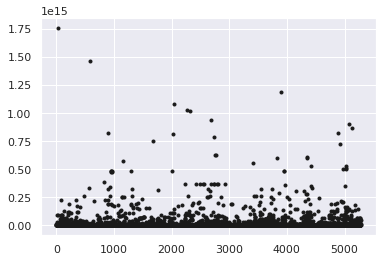

In [66]:
df['duration'].plot(style='k.')

In [67]:
df[df['duration']<'1 minute']['duration']

1      00:00:57
25     00:00:33
33     00:00:36
35     00:00:18
55     00:00:36
60     00:00:39
63     00:00:45
68     00:00:39
70     00:00:18
74     00:00:33
75     00:00:30
82     00:00:27
89     00:00:33
100    00:00:12
111    00:00:39
113    00:00:30
114    00:00:36
115    00:00:45
119    00:00:21
121    00:00:39
122    00:00:15
129    00:00:45
130    00:00:18
135    00:00:30
137    00:00:39
138    00:00:51
144    00:00:36
146    00:00:15
148    00:00:30
153    00:00:30
         ...   
5001   00:00:18
5053   00:00:24
5056   00:00:18
5065   00:00:51
5082   00:00:15
5096   00:00:36
5098   00:00:48
5106   00:00:36
5107   00:00:51
5148   00:00:27
5191   00:00:45
5211   00:00:54
5212   00:00:54
5213   00:00:54
5219   00:00:54
5229   00:00:30
5230   00:00:27
5231   00:00:51
5232   00:00:57
5234   00:00:54
5235   00:00:48
5236   00:00:54
5239   00:00:51
5240   00:00:51
5241   00:00:57
5242   00:00:57
5245   00:00:57
5246   00:00:54
5255   00:00:57
5259   00:00:48
Name: duration, Length: 

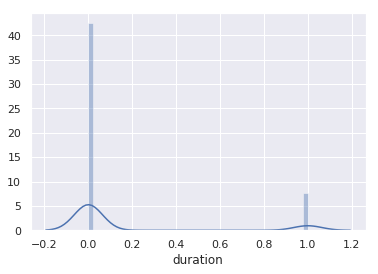

In [68]:
sns.distplot(df['duration']<'1 minute')

In [69]:
failed_or_worked =[]

In [70]:
print(len(df[df['duration']<'1 minute']))
failed_or_worked.append(len(df[df['duration']<'1 minute']))

797


In [71]:
print(len(df)-len(df[df['duration']<'1 minute']))
failed_or_worked.append(len(df)-len(df[df['duration']<'1 minute']))

4483


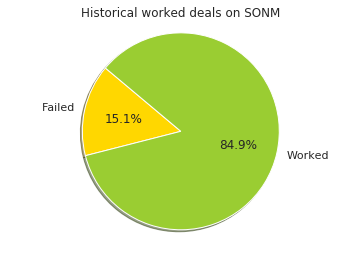

In [72]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Failed', 'Worked'
sizes = failed_or_worked
colors = ['gold', 'yellowgreen']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Historical worked deals on SONM')
plt.show()

In [73]:
failed_or_worked =[]

In [74]:
print(len(df[df['duration']<'5 minute']))
failed_or_worked.append(len(df[df['duration']<'5 minute']))

2343


In [75]:
print(len(df)-len(df[df['duration']<'5 minute']))
failed_or_worked.append(len(df)-len(df[df['duration']<'5 minute']))

2937


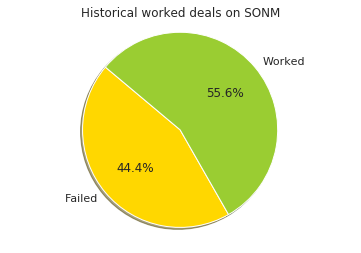

In [76]:

# Data to plot
labels = 'Failed', 'Worked'
sizes = failed_or_worked
colors = ['gold', 'yellowgreen']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Historical worked deals on SONM')
plt.show()

In [77]:
failed_or_worked =[]

In [78]:
print(len(df[df['duration']<'10 minute']))
failed_or_worked.append(len(df[df['duration']<'10 minute']))

3090


In [79]:
print(len(df)-len(df[df['duration']<'10 minute']))
failed_or_worked.append(len(df)-len(df[df['duration']<'10 minute']))

2190


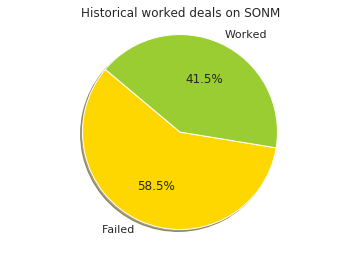

In [80]:

# Data to plot
labels = 'Failed', 'Worked'
sizes = failed_or_worked
colors = ['gold', 'yellowgreen']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Historical worked deals on SONM')
plt.show()

In [81]:
df7 = df[df["starttime"].dt.month==7]

1473
1000


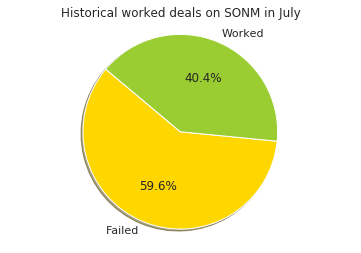

In [82]:
failed_or_worked =[]

print(len(df7[df7['duration']<'10 minute']))
failed_or_worked.append(len(df7[df7['duration']<'10 minute']))


print(len(df7)-len(df7[df7['duration']<'10 minute']))
failed_or_worked.append(len(df7)-len(df7[df7['duration']<'10 minute']))




# Data to plot
labels = 'Failed', 'Worked'
sizes = failed_or_worked
colors = ['gold', 'yellowgreen']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Historical worked deals on SONM in July')
plt.show()



In [83]:
df7 = df[df["starttime"].dt.month==8]

1597
1124


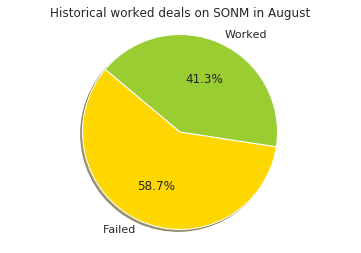

In [84]:
failed_or_worked =[]

print(len(df7[df7['duration']<'10 minute']))
failed_or_worked.append(len(df7[df7['duration']<'10 minute']))


print(len(df7)-len(df7[df7['duration']<'10 minute']))
failed_or_worked.append(len(df7)-len(df7[df7['duration']<'10 minute']))




# Data to plot
labels = 'Failed', 'Worked'
sizes = failed_or_worked
colors = ['gold', 'yellowgreen']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Historical worked deals on SONM in August')
plt.show()


In [85]:
df7 = df[df["starttime"].dt.month==6]

7
33


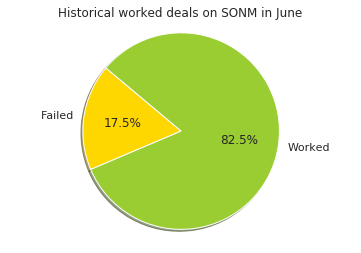

In [86]:
failed_or_worked =[]

print(len(df7[df7['duration']<'10 minute']))
failed_or_worked.append(len(df7[df7['duration']<'10 minute']))


print(len(df7)-len(df7[df7['duration']<'10 minute']))
failed_or_worked.append(len(df7)-len(df7[df7['duration']<'10 minute']))




# Data to plot
labels = 'Failed', 'Worked'
sizes = failed_or_worked
colors = ['gold', 'yellowgreen']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Historical worked deals on SONM in June')
plt.show()


In [87]:
df7 = df[df["starttime"].dt.month==9]

13
33


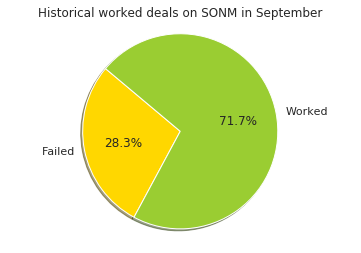

In [88]:
failed_or_worked =[]

print(len(df7[df7['duration']<'10 minute']))
failed_or_worked.append(len(df7[df7['duration']<'10 minute']))


print(len(df7)-len(df7[df7['duration']<'10 minute']))
failed_or_worked.append(len(df7)-len(df7[df7['duration']<'10 minute']))




# Data to plot
labels = 'Failed', 'Worked'
sizes = failed_or_worked
colors = ['gold', 'yellowgreen']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Historical worked deals on SONM in September')
plt.show()

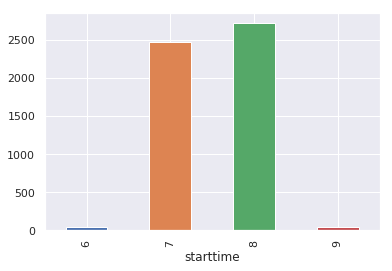

In [89]:
df.groupby(df["starttime"].dt.month).count()[0].plot(kind="bar", label = False)

In [90]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,4698,0x24E192b02d33501f225580d6B19A8d97C5190D45,2018-08-21 17:25:49,2018-08-21 19:39:19,02:13:30
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,720,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-09 23:16:40,2018-07-09 23:17:37,00:00:57
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-17 03:21:17,2018-08-17 03:26:26,00:05:09
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 02:56:02,2018-08-19 02:57:53,00:01:51


In [91]:
(df['starttime'][0] - df['endtime'][0]).seconds/60

1306

In [92]:
df['duration'][0].total_seconds()

8010.000000000001

In [93]:
def convert_duration_to_minutes(content):
    return content.total_seconds()/60

In [94]:
convert_duration_to_minutes(df['duration'][0])

133.50000000000003

In [95]:
df['duration_minutes']= df['duration'].apply(convert_duration_to_minutes)

In [96]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,4698,0x24E192b02d33501f225580d6B19A8d97C5190D45,2018-08-21 17:25:49,2018-08-21 19:39:19,02:13:30,133.50
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,720,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-09 23:16:40,2018-07-09 23:17:37,00:00:57,0.95
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45,198.75
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-17 03:21:17,2018-08-17 03:26:26,00:05:09,5.15
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 02:56:02,2018-08-19 02:57:53,00:01:51,1.85


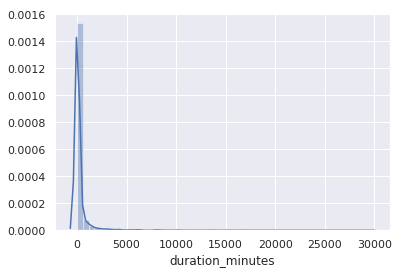

In [97]:
sns.distplot(df.duration_minutes)

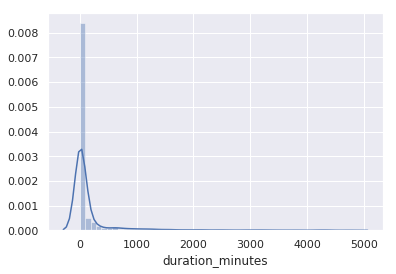

In [98]:
sns.distplot(df[df['duration_minutes']<5000]['duration_minutes'])

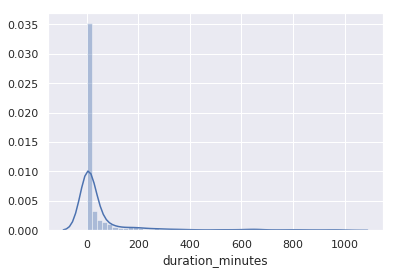

In [99]:
sns.distplot(df[df['duration_minutes']<1000]['duration_minutes'])

In [100]:
df2 = df[df['duration_minutes']>10]

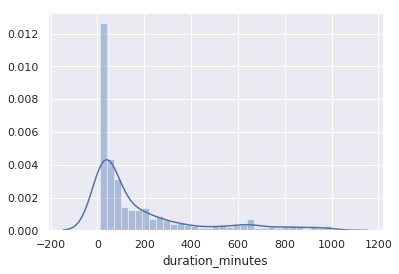

In [101]:
sns.distplot(df2[df2['duration_minutes']<1000]['duration_minutes'])

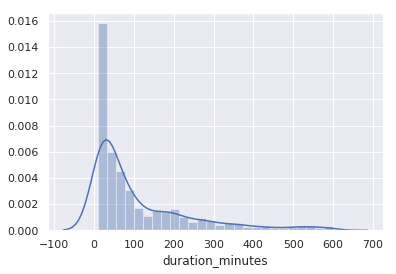

In [102]:
sns.distplot(df2[df2['duration_minutes']<600]['duration_minutes'])

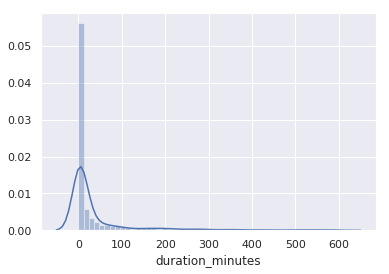

In [103]:
sns.distplot(df[df['duration_minutes']<600]['duration_minutes'])

In [104]:
df7 = df2[df2["starttime"].dt.month==7]

In [105]:
df8 = df2[df2["starttime"].dt.month==8]

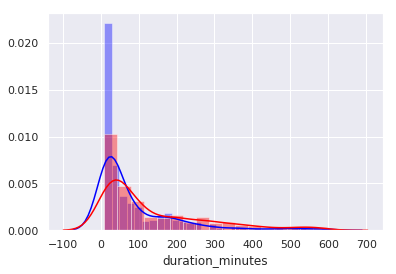

In [106]:
sns.distplot(df7[df7['duration_minutes']<600]['duration_minutes'], color = 'blue', label = 'July')
sns.distplot(df8[df8['duration_minutes']<600]['duration_minutes'], color = 'red', label = 'August')


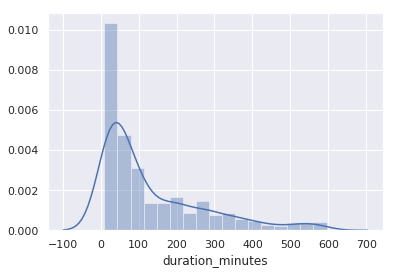

In [107]:
sns.distplot(df8[df8['duration_minutes']<600]['duration_minutes'])

# master_ID historical duration based

In [108]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,4698,0x24E192b02d33501f225580d6B19A8d97C5190D45,2018-08-21 17:25:49,2018-08-21 19:39:19,02:13:30,133.50
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,720,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-09 23:16:40,2018-07-09 23:17:37,00:00:57,0.95
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45,198.75
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-17 03:21:17,2018-08-17 03:26:26,00:05:09,5.15
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 02:56:02,2018-08-19 02:57:53,00:01:51,1.85


In [109]:
df.sort_values('duration_minutes', ascending= False)[['duration','consumer_ID','master_ID',  'price_USD/h','Ethash']].head(10)

,duration,consumer_ID,master_ID,price_USD/h,Ethash
23,20 days 09:14:45,0xF044524c6A30bC7559DEa1CB21fA11b1f5817833,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,0.000000,0.000
577,16 days 22:43:45,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x707ACE0EDF8A3451DB339ae7E66a180a4C5D5cB7,0.024402,25.056
3893,13 days 18:00:30,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x517648Ec2E592969Ec344642034F079c52AfD025,0.050000,59.126
2039,12 days 11:56:15,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,0.000000,0.000
2275,11 days 21:07:58,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,0.040000,42.298
2318,11 days 18:49:01,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,0.040000,42.535
2675,10 days 19:41:03,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0xf5c532D26cA0394822C1052989bfD36Dc3931ede,0.000000,0.000
5071,10 days 11:07:57,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f,0.011386,12.220
5129,10 days 02:16:27,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,0.000000,0.000
893,9 days 11:56:39,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,0.004000,0.000


In [110]:
df.groupby('master_ID').describe()

Ethash                            \
                                             count        mean           std   
master_ID                                                                      
0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a     2.0   48.841000  0.000000e+00   
0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3     2.0   43.452000  0.000000e+00   
0x0bF957203A68367c344c7B6b60729Fc8354915ef     1.0    0.000000           NaN   
0x12d5e94d46B65df250B43d426777462e66226F0f    50.0  159.800000  0.000000e+00   
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE    49.0  188.129204  6.893681e+01   
0x197B93384DE6572D9c282C44D45588B0e902C266    43.0   16.082442  2.222325e-01   
0x1a13173445903d59B1567378989590e6b15A16B7     9.0   16.246000  0.000000e+00   
0x1bC66B0374C997cF9CB087Ef184975f174c053b5     1.0    0.000000           NaN   
0x2031851e4d38A850A6A3527597d53D66928332a7    17.0    0.000000  0.000000e+00   
0x21dd5b54664222AbD2E0F43efbDc9F3C592874f1    19.0   13.253000  1.825033e-15   
0x22E00835bD4b84456Ab3aA5E61a7FF07AB57b4A8     1.0   24.722000           NaN   
0x22d709876F24Da89933008Cd714A1CB3B29090eE    27.0    0.000000  0.000000e+00   
0x24E192b02d33501f225580d6B19A8d97C5190D45    41.0   17.353463  1.584721e+01   
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4    67.0  133.448657  4.918008e+01   
0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3   460.0   49.959572  2.729223e+01   
0x25158E6f8dD683d222E3785BA2294A319489084E    56.0   37.646607  4.187550e+01   
0x257308430e87b7E45816Bda27DC76cbF739fCD30    44.0   43.986727  3.013388e+01   
0x25cAAc2BEB705b091A57D50d0297f0Daecb8A4D2    42.0    0.000000  0.000000e+00   
0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f    16.0   21.575187  1.153401e+01   
0x29E86F84A2D550deA9976d2a0198eBdD4BAB006b     1.0    0.000000           NaN   
0x2c743F2731c5803A649695930DD09a82Bba2B9c6     4.0    0.000000  0.000000e+00   
0x2ff5E25E63294728F2D0B10bAA36223E6D98702C     1.0   53.175000           NaN   
0x3D38C98eDDC026D8977767a30f8e8f6ec0405aBA     1.0    0.000000           NaN   
0x402DF15486Be8baEe6162a1b8A03a10d82D86232    14.0    0.000000  0.000000e+00   
0x416Af57F633e292b25976573a460d7C3200feD34   164.0  133.707561  5.889797e+01   
0x424129085f9b7F0Cc07c47D077206d835a2A7B2b    62.0   27.677177  8.264190e+00   
0x4AADcF4719a29C2bcC8481eddf848a5F3Cfc4fC1     3.0    8.292667  7.851964e-02   
0x4a7c2861127A7E0354B60f39EB7F478A1d1222bd     6.0   28.054000  1.054501e+01   
0x4a829486A0701c047AE8Ed5D541D622291A91dEe     3.0    0.000000  0.000000e+00   
0x4ccba01943Cc51Ba70232C42cBb8bd358fcBe15e     7.0    0.000000  0.000000e+00   
...                                            ...         ...           ...   
0xE8C01385bb6443AF00A42A91aef3b98b2445Fdad    63.0    0.000000  0.000000e+00   
0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F   152.0   86.627763  6.048799e+01   
0xF412cAADF8B33AdFFd8343066BFCc7B718f115F2    20.0    8.357400  4.186746e-02   
0xFc5Ed3751d48e4498F7556618D536ad124B131F7     6.0    0.000000  0.000000e+00   
0xFe388151D3d862f6A6178876eA5Cc4E5718F1957    87.0    1.224989  5.612438e+00   
0xa2b5595641f4CdDC55A4B2862Fb03BaE800222C0     1.0    0.000000           NaN   
0xa90f716CF6ed3Bb999FE735B4C845b8DAf49672F    22.0   41.296182  3.195160e+01   
0xaF8aDfD8fc6f5cb98C40046156D8fEb37Ab7f561    12.0    0.000000  0.000000e+00   
0xab6A4bFd3670c1221D0c7fdf4cF04EbcFd87dd25    17.0    0.000000  0.000000e+00   
0xb272F78Cb008CBe9102dA1202c4349A80468AdD4     1.0    0.000000           NaN   
0xb3A8866183ca88ED3c233337C4f85045a2aD7d1F     1.0   27.459000           NaN   
0xb5c46741B45317bFdF370D3d021a2515AC4fF998    11.0    0.000000  0.000000e+00   
0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d    18.0   21.711000  1.824089e+01   
0xbaCcB540c12bF3baaCD77beB161C31700022ED40     2.0    0.000000  0.000000e+00   
0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba    11.0    0.000000  0.000000e+00   
0xcBF471Deb96286f0bA09Fc98cA92Ee8c19fbd2e0     2.0    0.000000  0.000000e+00   
0xcE3B31E47c72ca2f5B043c150a357C20883336DF  

In [111]:
df50 = df.groupby('master_ID').describe()

In [112]:
df51 = df50['duration_minutes'][['count','mean']]

In [113]:
df51.to_csv('master_ID.csv')

In [114]:
df52 = pd.read_csv('master_ID.csv')

In [115]:
df52.head()

,master_ID,count,mean
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,49.0,63.553061


In [116]:
df52['master_ID'][0]

'0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a'

In [117]:
df[df.master_ID == df52['master_ID'][3]]

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
38,"{""deal"":{""id"":""3881""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3881,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-16 00:48:50,2018-08-16 03:45:35,02:56:45,176.750000
113,"{""deal"":{""id"":""3630""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3630,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 17:47:49,2018-08-15 17:48:19,00:00:30,0.500000
234,"{""deal"":{""id"":""3634""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3634,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 17:49:25,2018-08-15 17:50:16,00:00:51,0.850000
279,"{""deal"":{""id"":""3638""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3638,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 17:51:19,2018-08-15 17:52:19,00:01:00,1.000000
292,"{""deal"":{""id"":""3641""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3641,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 17:53:22,2018-08-15 23:32:26,05:39:04,339.066667
1249,"{""deal"":{""id"":""3703""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3703,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 23:33:17,2018-08-15 23:33:47,00:00:30,0.500000
1335,"{""deal"":{""id"":""3707""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3707,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 23:34:29,2018-08-15 23:35:02,00:00:33,0.550000
1507,"{""deal"":{""id"":""3711""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3711,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 23:35:47,2018-08-15 23:36:20,00:00:33,0.550000
1629,"{""deal"":{""id"":""3715""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3715,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 23:37:08,2018-08-15 23:37:44,00:00:36,0.600000
1817,"{""deal"":{""id"":""3719""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3719,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 23:38:29,2018-08-15 23:38:56,00:00:27,0.450000


In [118]:
df[df.master_ID == df52['master_ID'][3]]['duration_minutes']<10

38      False
113      True
234      True
279      True
292     False
1249     True
1335     True
1507     True
1629     True
1817     True
1870     True
1895     True
1932     True
1963     True
2008     True
2092     True
2099     True
2154     True
2199     True
2285    False
2291     True
2314     True
2319     True
2324     True
2338     True
2339     True
2341     True
2347     True
2352     True
2355     True
2363     True
2370     True
2371     True
2377     True
2383     True
2390     True
2453    False
2563    False
2571     True
2754    False
3113    False
3255    False
3269    False
3298     True
3303    False
3315     True
3332     True
3335     True
3339     True
3351    False
Name: duration_minutes, dtype: bool

In [119]:
df[df.master_ID == df52['master_ID'][3]][df[df.master_ID == df52['master_ID'][3]]['duration_minutes']<10]

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
113,"{""deal"":{""id"":""3630""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3630,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 17:47:49,2018-08-15 17:48:19,00:00:30,0.50
234,"{""deal"":{""id"":""3634""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3634,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 17:49:25,2018-08-15 17:50:16,00:00:51,0.85
279,"{""deal"":{""id"":""3638""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3638,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 17:51:19,2018-08-15 17:52:19,00:01:00,1.00
1249,"{""deal"":{""id"":""3703""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3703,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 23:33:17,2018-08-15 23:33:47,00:00:30,0.50
1335,"{""deal"":{""id"":""3707""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3707,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 23:34:29,2018-08-15 23:35:02,00:00:33,0.55
1507,"{""deal"":{""id"":""3711""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3711,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 23:35:47,2018-08-15 23:36:20,00:00:33,0.55
1629,"{""deal"":{""id"":""3715""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3715,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 23:37:08,2018-08-15 23:37:44,00:00:36,0.60
1817,"{""deal"":{""id"":""3719""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3719,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 23:38:29,2018-08-15 23:38:56,00:00:27,0.45
1870,"{""deal"":{""id"":""3724""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3724,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 23:39:47,2018-08-15 23:40:23,00:00:36,0.60
1895,"{""deal"":{""id"":""3730""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3730,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 23:41:17,2018-08-15 23:41:50,00:00:33,0.55


In [120]:
len(df[df.master_ID == df52['master_ID'][3]][df[df.master_ID == df52['master_ID'][3]]['duration_minutes']<10])

39

In [121]:
def count_failed_deal(content):
    return len(df[df.master_ID == content][df[df.master_ID == content]['duration_minutes']<10])

In [122]:
count_failed_deal(df52['master_ID'][3])

39

In [123]:
df52['failed_deal_number']=df52['master_ID'].apply(count_failed_deal)

In [124]:
df52.head()

,master_ID,count,mean,failed_deal_number
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,49.0,63.553061,39


In [125]:
df52['failed_deal_percent']=df52['failed_deal_number']/df52['count']*100

In [126]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.000000
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.000000
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.000000
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.000000
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,49.0,63.553061,39,79.591837


In [127]:
df52.sort_values('failed_deal_percent', ascending = False)

,master_ID,count,mean,failed_deal_number,failed_deal_percent
91,0xcBF471Deb96286f0bA09Fc98cA92Ee8c19fbd2e0,2.0,6.850000,2,100.000000
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.000000
22,0x3D38C98eDDC026D8977767a30f8e8f6ec0405aBA,1.0,7.100000,1,100.000000
34,0x600C6ad88D973eC1E3F040E3E4166FA49b57700c,2.0,1.575000,2,100.000000
19,0x29E86F84A2D550deA9976d2a0198eBdD4BAB006b,1.0,1.050000,1,100.000000
49,0x7f1D9bD0a76fA3DfBB2759bb37d5fB29B28C376F,2.0,1.525000,2,100.000000
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.000000
16,0x257308430e87b7E45816Bda27DC76cbF739fCD30,44.0,2.581818,42,95.454545
29,0x4ccba01943Cc51Ba70232C42cBb8bd358fcBe15e,7.0,6.442857,6,85.714286
78,0xF412cAADF8B33AdFFd8343066BFCc7B718f115F2,20.0,7.345000,17,85.000000


In [128]:
df52[df52['count']>10].sort_values('failed_deal_percent', ascending = False)[['master_ID','count','failed_deal_percent']]

,master_ID,count,failed_deal_percent
16,0x257308430e87b7E45816Bda27DC76cbF739fCD30,44.0,95.454545
78,0xF412cAADF8B33AdFFd8343066BFCc7B718f115F2,20.0,85.000000
43,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,88.0,80.681818
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,49.0,79.591837
5,0x197B93384DE6572D9c282C44D45588B0e902C266,43.0,79.069767
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,78.000000
67,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,112.0,74.107143
14,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,460.0,73.260870
60,0x9Ca4Bb5206553ca12e073795f820C41379e5Cc6c,11.0,72.727273
77,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,152.0,68.421053


In [129]:
df52[df52['count']>10].sort_values('failed_deal_percent')[['master_ID','count','failed_deal_percent']]

,master_ID,count,failed_deal_percent
83,0xaF8aDfD8fc6f5cb98C40046156D8fEb37Ab7f561,12.0,0.000000
8,0x2031851e4d38A850A6A3527597d53D66928332a7,17.0,5.882353
55,0x9115B03bA37AF450b21bc23b546Ff7666E30015D,42.0,14.285714
23,0x402DF15486Be8baEe6162a1b8A03a10d82D86232,14.0,14.285714
105,0xfc29ED3d7E470c26cd34ff33B96bEFbC8228BF03,12.0,16.666667
87,0xb5c46741B45317bFdF370D3d021a2515AC4fF998,11.0,18.181818
90,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,11.0,18.181818
68,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,68.0,25.000000
53,0x87d341DF84A64b5289cf8A504F22cC10F509E9d6,12.0,25.000000
36,0x61a2bB7A14177820F852afb95E3625b6A370079C,12.0,25.000000


In [130]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.000000
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.000000
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.000000
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.000000
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,49.0,63.553061,39,79.591837


In [131]:
df52['total_duration'] = df52['count']*df52['mean']

In [132]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.000000,321.433333
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.000000,11.500000
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.000000,2.350000
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.000000,2948.366667
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,49.0,63.553061,39,79.591837,3114.100000


In [133]:
df52.sort_values('total_duration', ascending = False)

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration
98,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1377.0,173.784193,896,65.068991,239300.833333
32,0x517648Ec2E592969Ec344642034F079c52AfD025,218.0,616.221865,89,40.825688,134336.366667
14,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,460.0,174.049058,337,73.260870,80062.566667
66,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,496.0,146.505208,308,62.096774,72666.583333
90,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,11.0,6310.650000,2,18.181818,69417.150000
23,0x402DF15486Be8baEe6162a1b8A03a10d82D86232,14.0,4868.013095,2,14.285714,68152.183333
11,0x22d709876F24Da89933008Cd714A1CB3B29090eE,27.0,2475.871605,10,37.037037,66848.533333
68,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,68.0,819.684314,17,25.000000,55738.533333
30,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,253.0,187.956192,141,55.731225,47552.916667
80,0xFe388151D3d862f6A6178876eA5Cc4E5718F1957,87.0,542.967241,37,42.528736,47238.150000


In [134]:
df52.sort_values('total_duration', ascending = False).head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration
98,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1377.0,173.784193,896,65.068991,239300.833333
32,0x517648Ec2E592969Ec344642034F079c52AfD025,218.0,616.221865,89,40.825688,134336.366667
14,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,460.0,174.049058,337,73.260870,80062.566667
66,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,496.0,146.505208,308,62.096774,72666.583333
90,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,11.0,6310.650000,2,18.181818,69417.150000


In [135]:
df52.sort_values('total_duration', ascending = False)[['master_ID','count','total_duration','failed_deal_percent']]

,master_ID,count,total_duration,failed_deal_percent
98,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1377.0,239300.833333,65.068991
32,0x517648Ec2E592969Ec344642034F079c52AfD025,218.0,134336.366667,40.825688
14,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,460.0,80062.566667,73.260870
66,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,496.0,72666.583333,62.096774
90,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,11.0,69417.150000,18.181818
23,0x402DF15486Be8baEe6162a1b8A03a10d82D86232,14.0,68152.183333,14.285714
11,0x22d709876F24Da89933008Cd714A1CB3B29090eE,27.0,66848.533333,37.037037
68,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,68.0,55738.533333,25.000000
30,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,253.0,47552.916667,55.731225
80,0xFe388151D3d862f6A6178876eA5Cc4E5718F1957,87.0,47238.150000,42.528736


In [136]:
len(df52)

106

In [137]:
df52.sort_values('count', ascending = False)[['master_ID','count','total_duration','failed_deal_percent']]

,master_ID,count,total_duration,failed_deal_percent
98,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1377.0,239300.833333,65.068991
66,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,496.0,72666.583333,62.096774
14,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,460.0,80062.566667,73.260870
30,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,253.0,47552.916667,55.731225
32,0x517648Ec2E592969Ec344642034F079c52AfD025,218.0,134336.366667,40.825688
24,0x416Af57F633e292b25976573a460d7C3200feD34,164.0,40641.883333,58.536585
77,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,152.0,31874.550000,68.421053
41,0x6F6B9a47668D96b3758D79c67c30A290934a759F,142.0,29173.700000,65.492958
45,0x707ACE0EDF8A3451DB339ae7E66a180a4C5D5cB7,118.0,27965.250000,59.322034
74,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,113.0,21436.450000,67.256637


In [138]:
df.groupby('master_ID').describe()['price_USD/h']['mean']

master_ID
0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a    0.046514
0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3    0.037993
0x0bF957203A68367c344c7B6b60729Fc8354915ef    0.700000
0x12d5e94d46B65df250B43d426777462e66226F0f    0.149177
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE    0.159597
0x197B93384DE6572D9c282C44D45588B0e902C266    0.015260
0x1a13173445903d59B1567378989590e6b15A16B7    0.020570
0x1bC66B0374C997cF9CB087Ef184975f174c053b5    0.031752
0x2031851e4d38A850A6A3527597d53D66928332a7    0.003067
0x21dd5b54664222AbD2E0F43efbDc9F3C592874f1    0.015314
0x22E00835bD4b84456Ab3aA5E61a7FF07AB57b4A8    0.029976
0x22d709876F24Da89933008Cd714A1CB3B29090eE    0.026889
0x24E192b02d33501f225580d6B19A8d97C5190D45    0.015576
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4    0.128381
0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3    0.054145
0x25158E6f8dD683d222E3785BA2294A319489084E    0.032324
0x257308430e87b7E45816Bda27DC76cbF739fCD30    0.026300
0x25cAAc2BEB705b091A57D50d0297f0Daecb8A4D2    0.003941


In [139]:
df52['mean_price_USD/h'] = df.groupby('master_ID').describe()['price_USD/h']['mean'].values

In [140]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration,mean_price_USD/h
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.000000,321.433333,0.046514
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.000000,11.500000,0.037993
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.000000,2.350000,0.700000
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.000000,2948.366667,0.149177
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,49.0,63.553061,39,79.591837,3114.100000,0.159597


In [141]:
df52['total_duration_h'] =  df52['total_duration']/60

In [142]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration,mean_price_USD/h,total_duration_h
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.000000,321.433333,0.046514,5.357222
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.000000,11.500000,0.037993,0.191667
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.000000,2.350000,0.700000,0.039167
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.000000,2948.366667,0.149177,49.139444
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,49.0,63.553061,39,79.591837,3114.100000,0.159597,51.901667


In [143]:
df52['total_revenue_USD'] = df52['total_duration_h']*df52['mean_price_USD/h']

In [144]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration,mean_price_USD/h,total_duration_h,total_revenue_USD
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.000000,321.433333,0.046514,5.357222,0.249187
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.000000,11.500000,0.037993,0.191667,0.007282
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.000000,2.350000,0.700000,0.039167,0.027417
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.000000,2948.366667,0.149177,49.139444,7.330452
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,49.0,63.553061,39,79.591837,3114.100000,0.159597,51.901667,8.283373


In [145]:
df52.sort_values('total_revenue_USD', ascending = False)

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration,mean_price_USD/h,total_duration_h,total_revenue_USD
98,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1377.0,173.784193,896,65.068991,239300.833333,0.083294,3988.347222,332.203584
32,0x517648Ec2E592969Ec344642034F079c52AfD025,218.0,616.221865,89,40.825688,134336.366667,0.053459,2238.939444,119.690603
68,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,68.0,819.684314,17,25.000000,55738.533333,0.103307,928.975556,95.969972
24,0x416Af57F633e292b25976573a460d7C3200feD34,164.0,247.816362,96,58.536585,40641.883333,0.118087,677.364722,79.987749
92,0xcE3B31E47c72ca2f5B043c150a357C20883336DF,26.0,1299.180769,8,30.769231,33778.700000,0.136273,562.978333,76.718810
14,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,460.0,174.049058,337,73.260870,80062.566667,0.054145,1334.376111,72.249876
77,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,152.0,209.700987,104,68.421053,31874.550000,0.093412,531.242500,49.624201
53,0x87d341DF84A64b5289cf8A504F22cC10F509E9d6,12.0,1639.525000,3,25.000000,19674.300000,0.110000,327.905000,36.069550
74,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,113.0,189.703097,76,67.256637,21436.450000,0.084314,357.274167,30.123256
11,0x22d709876F24Da89933008Cd714A1CB3B29090eE,27.0,2475.871605,10,37.037037,66848.533333,0.026889,1114.142222,29.958046


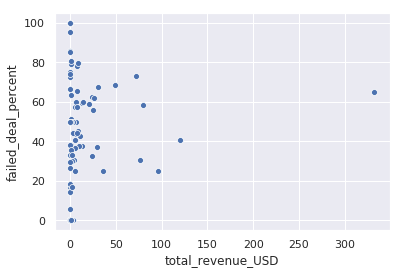

In [146]:
sns.scatterplot(data = df52, x = 'total_revenue_USD', y = 'failed_deal_percent')

In [147]:
df52.sort_values('total_revenue_USD', ascending = False).head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration,mean_price_USD/h,total_duration_h,total_revenue_USD
98,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1377.0,173.784193,896,65.068991,239300.833333,0.083294,3988.347222,332.203584
32,0x517648Ec2E592969Ec344642034F079c52AfD025,218.0,616.221865,89,40.825688,134336.366667,0.053459,2238.939444,119.690603
68,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,68.0,819.684314,17,25.000000,55738.533333,0.103307,928.975556,95.969972
24,0x416Af57F633e292b25976573a460d7C3200feD34,164.0,247.816362,96,58.536585,40641.883333,0.118087,677.364722,79.987749
92,0xcE3B31E47c72ca2f5B043c150a357C20883336DF,26.0,1299.180769,8,30.769231,33778.700000,0.136273,562.978333,76.718810


In [148]:
df52.sort_values('total_revenue_USD', ascending = False)[['master_ID','count','total_duration_h','failed_deal_percent','total_revenue_USD']]

,master_ID,count,total_duration_h,failed_deal_percent,total_revenue_USD
98,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1377.0,3988.347222,65.068991,332.203584
32,0x517648Ec2E592969Ec344642034F079c52AfD025,218.0,2238.939444,40.825688,119.690603
68,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,68.0,928.975556,25.000000,95.969972
24,0x416Af57F633e292b25976573a460d7C3200feD34,164.0,677.364722,58.536585,79.987749
92,0xcE3B31E47c72ca2f5B043c150a357C20883336DF,26.0,562.978333,30.769231,76.718810
14,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,460.0,1334.376111,73.260870,72.249876
77,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,152.0,531.242500,68.421053,49.624201
53,0x87d341DF84A64b5289cf8A504F22cC10F509E9d6,12.0,327.905000,25.000000,36.069550
74,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,113.0,357.274167,67.256637,30.123256
11,0x22d709876F24Da89933008Cd714A1CB3B29090eE,27.0,1114.142222,37.037037,29.958046


In [149]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration,mean_price_USD/h,total_duration_h,total_revenue_USD
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.000000,321.433333,0.046514,5.357222,0.249187
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.000000,11.500000,0.037993,0.191667,0.007282
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.000000,2.350000,0.700000,0.039167,0.027417
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.000000,2948.366667,0.149177,49.139444,7.330452
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,49.0,63.553061,39,79.591837,3114.100000,0.159597,51.901667,8.283373


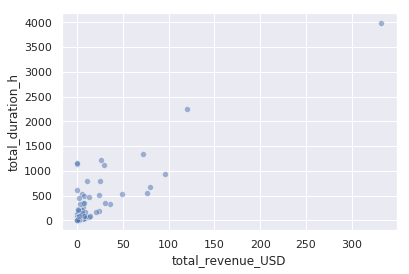

In [150]:
sns.scatterplot(data = df52, x = 'total_revenue_USD', y = 'total_duration_h', alpha = 0.5)

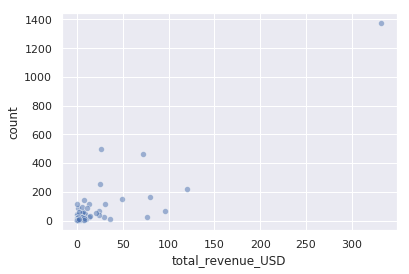

In [151]:
sns.scatterplot(data = df52, x = 'total_revenue_USD', y = 'count', alpha = 0.5)

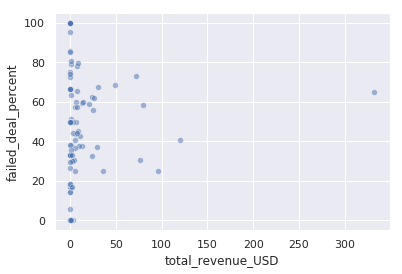

In [152]:
sns.scatterplot(data = df52, x = 'total_revenue_USD', y = 'failed_deal_percent', alpha = 0.5)

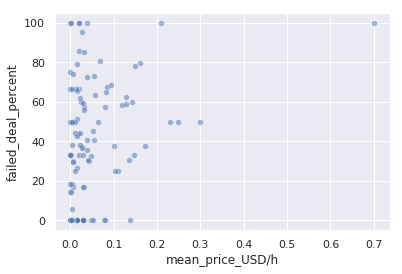

In [153]:
sns.scatterplot(data = df52, x = 'mean_price_USD/h', y = 'failed_deal_percent', alpha = 0.5)

## top suppliers best customers

In [172]:
df52 = df52.sort_values('total_revenue_USD', ascending = False)

In [173]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration,mean_price_USD/h,total_duration_h,total_revenue_USD
98,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1377.0,173.784193,896,65.068991,239300.833333,0.083294,3988.347222,332.203584
32,0x517648Ec2E592969Ec344642034F079c52AfD025,218.0,616.221865,89,40.825688,134336.366667,0.053459,2238.939444,119.690603
68,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,68.0,819.684314,17,25.000000,55738.533333,0.103307,928.975556,95.969972
24,0x416Af57F633e292b25976573a460d7C3200feD34,164.0,247.816362,96,58.536585,40641.883333,0.118087,677.364722,79.987749
92,0xcE3B31E47c72ca2f5B043c150a357C20883336DF,26.0,1299.180769,8,30.769231,33778.700000,0.136273,562.978333,76.718810


In [179]:
df[df.master_ID == '0xedB7Ae4B946Cf249349974A02e354B5FBC577798'].groupby('consumer_ID').describe()['price_USD/h'].sort_values('count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
consumer_ID,,,,,,,,
0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,601.0,0.044064,0.016989,0.000000e+00,0.038397,0.053870,0.053870,0.069526
0x417c92FbD944b125A578848DE44a4FD9132E0911,473.0,0.140293,0.109906,1.600759e-02,0.042163,0.086650,0.290453,0.344764
0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,81.0,0.109880,0.098786,1.440000e-14,0.040000,0.052635,0.204600,0.430000
0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,39.0,0.003308,0.001962,1.000000e-03,0.001000,0.005000,0.005000,0.005000
0xedB7Ae4B946Cf249349974A02e354B5FBC577798,34.0,0.074826,0.048637,0.000000e+00,0.040000,0.057043,0.100000,0.150000
0xC55339c316ab31276A0a1489E2C4ecD9c19CBdfb,33.0,0.037504,0.011244,1.972234e-02,0.034320,0.037486,0.049521,0.049521
0xE8C01385bb6443AF00A42A91aef3b98b2445Fdad,28.0,0.057084,0.001316,5.364863e-02,0.057354,0.057386,0.057399,0.060100
0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,18.0,0.154444,0.046301,4.000000e-02,0.125000,0.170000,0.195000,0.200000
0xbAB383464dC6732b7E36EbCAA909ED0192faFaBb,17.0,0.046989,0.015754,3.882064e-02,0.040000,0.040000,0.040000,0.080000


In [180]:
df_B7 = df[df.master_ID == '0xedB7Ae4B946Cf249349974A02e354B5FBC577798'].groupby('consumer_ID').describe()['price_USD/h'].sort_values('count', ascending = False)

In [184]:
df_B7.to_csv('B7.csv')

In [185]:
dfB7 = pd.read_csv('B7.csv')

In [187]:
dfB7.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max
0,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,601.0,0.044064,0.016989,0.000000e+00,0.038397,0.053870,0.053870,0.069526
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,473.0,0.140293,0.109906,1.600759e-02,0.042163,0.086650,0.290453,0.344764
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,81.0,0.109880,0.098786,1.440000e-14,0.040000,0.052635,0.204600,0.430000
3,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,39.0,0.003308,0.001962,1.000000e-03,0.001000,0.005000,0.005000,0.005000
4,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,34.0,0.074826,0.048637,0.000000e+00,0.040000,0.057043,0.100000,0.150000


In [190]:
df[df.master_ID == '0xedB7Ae4B946Cf249349974A02e354B5FBC577798'].groupby('consumer_ID').describe()['duration_minutes']['mean']

consumer_ID
0x1124fCC307756f4077c5e8E09b948C1CA7123eC9      33.687937
0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb     617.567078
0x1a13173445903d59B1567378989590e6b15A16B7     846.071429
0x417c92FbD944b125A578848DE44a4FD9132E0911      89.353066
0x47700c0f8c34a42BA88B35c9E67E5A925c7BF245       4.000000
0x517648Ec2E592969Ec344642034F079c52AfD025      57.225000
0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5      67.910000
0x7610dd9944615263d9858101Dd197C90255DBa93     255.450000
0x921DfF043950872280116dC949e675A5e1aC726D     107.950000
0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01      20.436111
0xC55339c316ab31276A0a1489E2C4ecD9c19CBdfb      69.513636
0xE75Bba413A645d0b6fB851b969fE033b478BC992    2666.325000
0xE8C01385bb6443AF00A42A91aef3b98b2445Fdad     285.978571
0xF044524c6A30bC7559DEa1CB21fA11b1f5817833    6735.816667
0xb4Eba44EE900A68b8B745eFCC34b4D8A80C2dB10      32.455000
0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d     360.488095
0xbAB383464dC6732b7E36EbCAA909ED0192faFaBb     526.911765
0x

In [192]:
dfB7['duration_minutes_mean'] = df[df.master_ID == '0xedB7Ae4B946Cf249349974A02e354B5FBC577798'].groupby('consumer_ID').describe()['duration_minutes']['mean'].values

In [194]:
dfB7['total_duration_minutes']=dfB7['count']*dfB7['duration_minutes_mean']

In [195]:
dfB7.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max,duration_minutes_mean,total_duration_minutes
0,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,601.0,0.044064,0.016989,0.000000e+00,0.038397,0.053870,0.053870,0.069526,33.687937,20246.450000
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,473.0,0.140293,0.109906,1.600759e-02,0.042163,0.086650,0.290453,0.344764,617.567078,292109.227984
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,81.0,0.109880,0.098786,1.440000e-14,0.040000,0.052635,0.204600,0.430000,846.071429,68531.785714
3,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,39.0,0.003308,0.001962,1.000000e-03,0.001000,0.005000,0.005000,0.005000,89.353066,3484.769556
4,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,34.0,0.074826,0.048637,0.000000e+00,0.040000,0.057043,0.100000,0.150000,4.000000,136.000000


In [200]:
dfB7['total_expense_USD'] = dfB7['count']*dfB7['total_duration_minutes']/60

In [201]:
dfB7.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max,duration_minutes_mean,total_duration_minutes,total_expense_USD
0,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,601.0,0.044064,0.016989,0.000000e+00,0.038397,0.053870,0.053870,0.069526,33.687937,20246.450000,2.028019e+05
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,473.0,0.140293,0.109906,1.600759e-02,0.042163,0.086650,0.290453,0.344764,617.567078,292109.227984,2.302794e+06
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,81.0,0.109880,0.098786,1.440000e-14,0.040000,0.052635,0.204600,0.430000,846.071429,68531.785714,9.251791e+04
3,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,39.0,0.003308,0.001962,1.000000e-03,0.001000,0.005000,0.005000,0.005000,89.353066,3484.769556,2.265100e+03
4,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,34.0,0.074826,0.048637,0.000000e+00,0.040000,0.057043,0.100000,0.150000,4.000000,136.000000,7.706667e+01


# Same analysis for consumers

In [154]:
df.groupby('consumer_ID').describe()

Ethash                         \
                                             count        mean        std   
consumer_ID                                                                 
0x0bF957203A68367c344c7B6b60729Fc8354915ef     2.0   19.474500  10.103849   
0x1124fCC307756f4077c5e8E09b948C1CA7123eC9  1341.0   42.384800  14.110975   
0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb   427.0   44.247841  56.807288   
0x1a13173445903d59B1567378989590e6b15A16B7    11.0   20.933455   4.189422   
0x22d709876F24Da89933008Cd714A1CB3B29090eE     6.0    0.000000   0.000000   
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4     2.0  172.350000   0.000000   
0x25158E6f8dD683d222E3785BA2294A319489084E     1.0   16.246000        NaN   
0x384B08b25B4B78eb43969b2500999d1Ac3c82007    30.0   19.463167  43.891490   
0x4138Feb376d3a85ebD4E211fa8A7dAd081575494     1.0   53.251000        NaN   
0x417c92FbD944b125A578848DE44a4FD9132E0911  2103.0   78.983470  67.833454   
0x4567Da76D1c0239c21b33fa9aD767E9188108c0e     1.0    0.000000        NaN   
0x47700c0f8c34a42BA88B35c9E67E5A925c7BF245    23.0   27.677609  24.115005   
0x49f6C95B97C209F814c5b3B13428E91686a1FEd9     9.0    0.000000   0.000000   
0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA   213.0    0.000000   0.000000   
0x517648Ec2E592969Ec344642034F079c52AfD025     5.0   75.670000   9.248377   
0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5   138.0   55.876739  53.933380   
0x63dA2009Ff928f99D960F48CBDd76C5a3E8591c4     2.0    9.720500  13.746863   
0x65A235FFf4F2c6344642c417cb4cE9fA698A5d2b     1.0    0.000000        NaN   
0x67588f2F50227F200B3dd6bd2Bf23076A27C18Ea     3.0    0.000000   0.000000   
0x6bdAc2AE57AA8325206bDD076e3022b12D64a4b6    15.0    0.000000   0.000000   
0x73208ae757b5a5747d79da4a08ba4FB3012ef0E8     5.0    0.000000   0.000000   
0x75CA26f23e0fC696af5Cb135b0ABfD53807691fE     1.0    0.000000        NaN   
0x75f554D5298c25C14De9D4BF12c6C1e19F9DB752     1.0    0.000000        NaN   
0x7610dd9944615263d9858101Dd197C90255DBa93    85.0    2.582812  23.812348   
0x77D216e0D9EDb9e99AC1c34152C52e7d9F799117    14.0   35.154286  13.154562   
0x87d341DF84A64b5289cf8A504F22cC10F509E9d6     2.0    0.000000   0.000000   
0x921DfF043950872280116dC949e675A5e1aC726D     5.0    5.589800   8.741249   
0x9da256F79Fa66Bb20626940e23590219a2b9746E     1.0    0.000000        NaN   
0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01    68.0   86.520588  72.227205   
0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE    54.0    0.000000   0.000000   
0xC0374AcF397563dBD8DeE433dd2d956729b9dBdA     6.0    0.000000   0.000000   
0xC55339c316ab31276A0a1489E2C4ecD9c19CBdfb    57.0   39.114404  14.116247   
0xCAF1d4F102Da3aa56CDCE3dAA4E5121EF72EFCD1     1.0    0.000000        NaN   
0xE75Bba413A645d0b6fB851b969fE033b478BC992     2.0   26.625000   0.000000   
0xE8C01385bb6443AF00A42A91aef3b98b2445Fdad    43.0   56.480186  23.809086   
0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F     7.0   93.352000  46.137366   
0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11     1.0    0.000000        NaN   
0xF044524c6A30bC7559DEa1CB21fA11b1f5817833     6.0    0.000000   0.000000   
0xF722c6A22B38c087e9249afe6a2fd7635ffB154E     3.0    0.000000   0.000000   
0xFc5Ed3751d48e4498F7556618D536ad124B131F7     1.0   26.655000        NaN   
0xb4Eba44EE900A68b8B745eFCC34b4D8A80C2dB10    45.0   55.761578  30.581966   
0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d    15.0   34.578067  36.994099   
0xbAB383464dC6732b7E36EbCAA909ED0192faFaBb    30.0   28.676867  11.130898   
0xbaCcB540c12bF3baaCD77beB161C31700022ED40    21.0   19.689143  14.597532   
0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba   328.0    0.000000   0.000000   
0xd7eE275c57917cD2EeA621bfc0b1f80EA59381Ff     2.0    0.000000   0.000000   
0xe7517190DB97Ea55E985abdA33745AfC41a83592    45.0    0.183911   1.233713   
0xeFe1976D528FdeAC56E09115462dDedB26254BF7    28.0    0.000000   0.000000   
0xedB7Ae4B946Cf249349974A02e354B5FBC577798    69.0   62.748739  59.162127   

                                       

In [155]:
df61 = df.groupby('consumer_ID').describe()

In [156]:
df61['duration_minutes'][['count','mean']]

,count,mean
consumer_ID,,
0x0bF957203A68367c344c7B6b60729Fc8354915ef,2.0,190.025000
0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,41.938143
0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,427.0,1220.622912
0x1a13173445903d59B1567378989590e6b15A16B7,11.0,594.109091
0x22d709876F24Da89933008Cd714A1CB3B29090eE,6.0,650.250000
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4,2.0,0.725000
0x25158E6f8dD683d222E3785BA2294A319489084E,1.0,4.850000
0x384B08b25B4B78eb43969b2500999d1Ac3c82007,30.0,503.024444
0x4138Feb376d3a85ebD4E211fa8A7dAd081575494,1.0,1.750000


In [157]:
df62 = df61['duration_minutes'][['count','mean']]

In [158]:
df62.to_csv('consumer.csv')

In [159]:
df62 = pd.read_csv('consumer.csv')

In [160]:
df62.head()

,consumer_ID,count,mean
0,0x0bF957203A68367c344c7B6b60729Fc8354915ef,2.0,190.025000
1,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,41.938143
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,427.0,1220.622912
3,0x1a13173445903d59B1567378989590e6b15A16B7,11.0,594.109091
4,0x22d709876F24Da89933008Cd714A1CB3B29090eE,6.0,650.250000


In [161]:
df62['total_duration_minute'] = df62['count']*df62['mean']

In [162]:
df62.head()

,consumer_ID,count,mean,total_duration_minute
0,0x0bF957203A68367c344c7B6b60729Fc8354915ef,2.0,190.025000,380.050000
1,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,41.938143,56239.050000
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,427.0,1220.622912,521205.983334
3,0x1a13173445903d59B1567378989590e6b15A16B7,11.0,594.109091,6535.200000
4,0x22d709876F24Da89933008Cd714A1CB3B29090eE,6.0,650.250000,3901.500000


In [163]:
df62['total_duration_h']=df62['total_duration_minute']/60

In [164]:
df62.head()

,consumer_ID,count,mean,total_duration_minute,total_duration_h
0,0x0bF957203A68367c344c7B6b60729Fc8354915ef,2.0,190.025000,380.050000,6.334167
1,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,41.938143,56239.050000,937.317500
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,427.0,1220.622912,521205.983334,8686.766389
3,0x1a13173445903d59B1567378989590e6b15A16B7,11.0,594.109091,6535.200000,108.920000
4,0x22d709876F24Da89933008Cd714A1CB3B29090eE,6.0,650.250000,3901.500000,65.025000


In [166]:
df62.sort_values('total_duration_h', ascending = False)

,consumer_ID,count,mean,total_duration_minute,total_duration_h
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,427.0,1220.622912,521205.983334,8686.766389
9,0x417c92FbD944b125A578848DE44a4FD9132E0911,2103.0,168.187938,353699.233334,5894.987222
44,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,328.0,648.198984,212609.266667,3543.487778
1,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,41.938143,56239.050000,937.317500
13,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,213.0,182.605164,38894.900000,648.248333
48,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,69.0,556.713768,38413.250000,640.220833
12,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,9.0,4178.077778,37602.700000,626.711667
28,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,68.0,511.110784,34755.533333,579.258889
37,0xF044524c6A30bC7559DEa1CB21fA11b1f5817833,6.0,5613.238889,33679.433333,561.323889
46,0xe7517190DB97Ea55E985abdA33745AfC41a83592,45.0,479.880000,21594.600000,359.910000


In [167]:
df62.sort_values('total_duration_h', ascending = False).head()

,consumer_ID,count,mean,total_duration_minute,total_duration_h
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,427.0,1220.622912,521205.983334,8686.766389
9,0x417c92FbD944b125A578848DE44a4FD9132E0911,2103.0,168.187938,353699.233334,5894.987222
44,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,328.0,648.198984,212609.266667,3543.487778
1,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,41.938143,56239.050000,937.317500
13,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,213.0,182.605164,38894.900000,648.248333


In [168]:
df62.sort_values('total_duration_h', ascending = False)[['consumer_ID','count','total_duration_h']]

,consumer_ID,count,total_duration_h
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,427.0,8686.766389
9,0x417c92FbD944b125A578848DE44a4FD9132E0911,2103.0,5894.987222
44,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,328.0,3543.487778
1,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,937.317500
13,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,213.0,648.248333
48,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,69.0,640.220833
12,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,9.0,626.711667
28,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,68.0,579.258889
37,0xF044524c6A30bC7559DEa1CB21fA11b1f5817833,6.0,561.323889
46,0xe7517190DB97Ea55E985abdA33745AfC41a83592,45.0,359.910000


In [169]:
len(df62)

49

In [170]:
df62.sort_values('count', ascending = False)[['consumer_ID','count','total_duration_h']]

,consumer_ID,count,total_duration_h
9,0x417c92FbD944b125A578848DE44a4FD9132E0911,2103.0,5894.987222
1,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,937.317500
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,427.0,8686.766389
44,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,328.0,3543.487778
13,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,213.0,648.248333
15,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,138.0,133.107222
23,0x7610dd9944615263d9858101Dd197C90255DBa93,85.0,58.818333
48,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,69.0,640.220833
28,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,68.0,579.258889
31,0xC55339c316ab31276A0a1489E2C4ecD9c19CBdfb,57.0,86.616667


# new plots

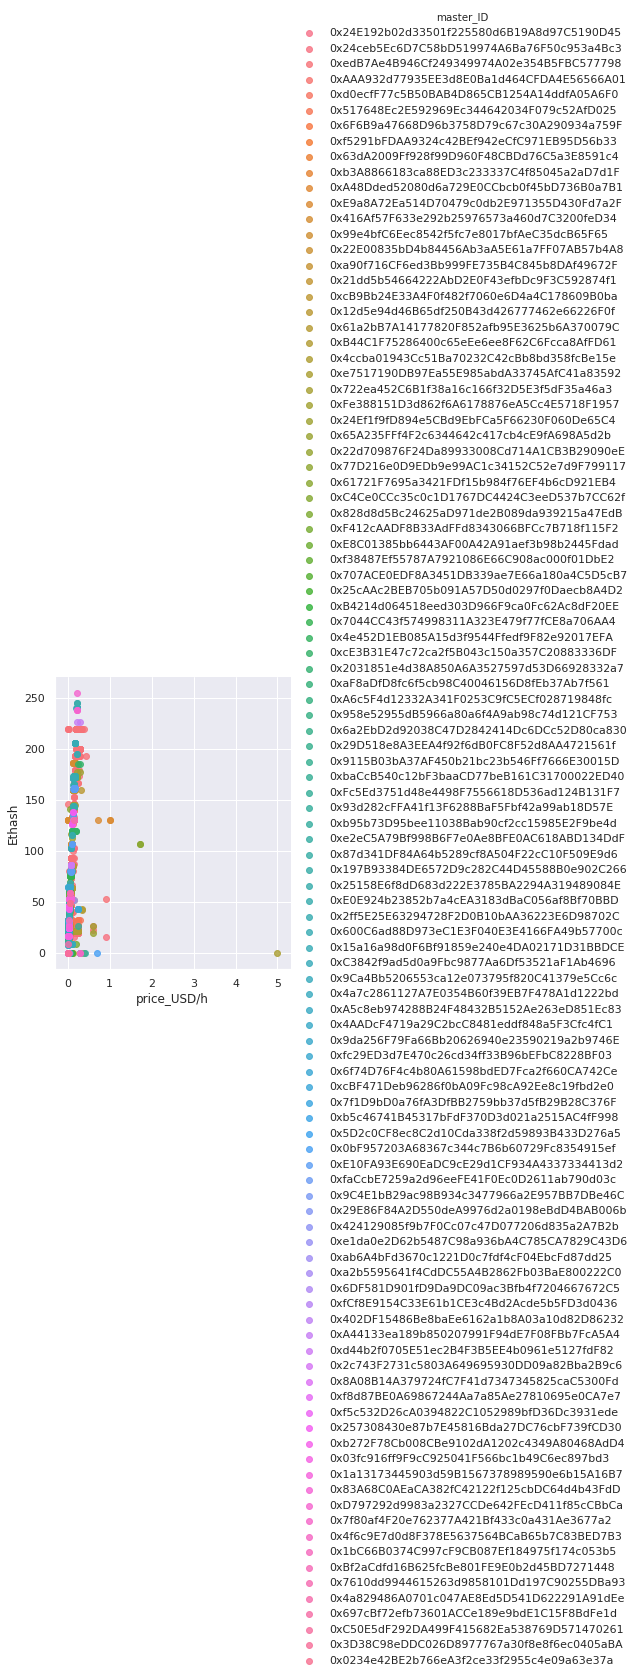

In [204]:
sns.lmplot( y="Ethash", x="price_USD/h", data=df, fit_reg=False, hue='master_ID', legend=True)

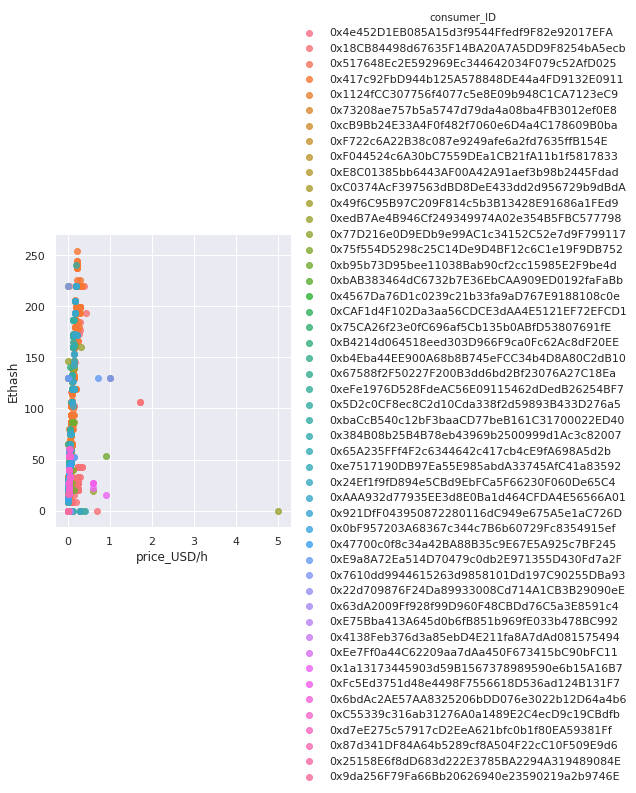

In [205]:
sns.lmplot( y="Ethash", x="price_USD/h", data=df, fit_reg=False, hue='consumer_ID', legend=True)

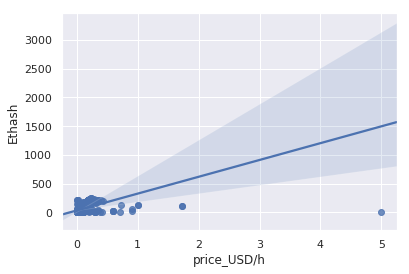

In [206]:
sns.regplot( y="Ethash", x="price_USD/h", data=df)

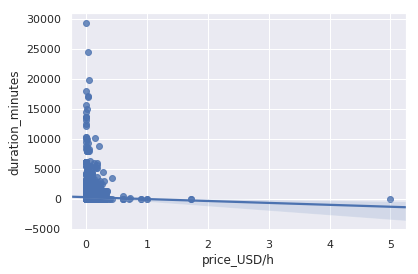

In [208]:
sns.regplot( y="duration_minutes", x="price_USD/h", data=df)

In [222]:
N = 1000
times = pd.date_range('2018-06', '2018-09', freq='H')
ind = np.random.permutation(np.arange(len(times)))[:N]

data = pd.DataFrame({'TIMESTAMP': times,
                     'TYPE': np.random.randint(0, 10, len(times))})
data.head()

,TIMESTAMP,TYPE
0,2018-06-01 00:00:00,9
1,2018-06-01 01:00:00,4
2,2018-06-01 02:00:00,9
3,2018-06-01 03:00:00,6
4,2018-06-01 04:00:00,9


In [223]:
len(data)

2209

In [235]:
data['TIMESTAMP'][2000]

Timestamp('2018-08-23 08:00:00')

In [226]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,4698,0x24E192b02d33501f225580d6B19A8d97C5190D45,2018-08-21 17:25:49,2018-08-21 19:39:19,02:13:30,133.50
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,720,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-09 23:16:40,2018-07-09 23:17:37,00:00:57,0.95
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45,198.75
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-17 03:21:17,2018-08-17 03:26:26,00:05:09,5.15
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 02:56:02,2018-08-19 02:57:53,00:01:51,1.85


In [239]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])]

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
3019,"{""deal"":{""id"":""4879""","""benchmarks"":{""values"":[104",1949,16,512000000,67108864,1000001,1000000,3,6372196352,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xA0885038D127f628B3DC7f406004dE104d0bF496,0.050831,59.499,4879,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,2018-08-23 06:28:52,2018-08-23 08:42:58,0 days 02:14:06,134.100000
3365,"{""deal"":{""id"":""4883""","""benchmarks"":{""values"":[103",1288,2,512000000,67108864,1000000,1000000,6,8152825856,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x7C339f2cfeeDFDB1748a15E466F6bbC49770B48A,0.147143,165.157,4883,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,2018-08-23 07:58:52,2018-08-23 08:25:10,0 days 00:26:18,26.300000
3413,"{""deal"":{""id"":""4878""","""benchmarks"":{""values"":[104",1949,16,512000000,67108864,1000001,1000000,1,6373244928,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xA0885038D127f628B3DC7f406004dE104d0bF496,0.017390,19.827,4878,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,2018-08-23 06:28:28,2018-08-23 08:42:37,0 days 02:14:09,134.150000
3533,"{""deal"":{""id"":""4836""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,11718885376,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.028091,32.454,4836,0x517648Ec2E592969Ec344642034F079c52AfD025,2018-08-22 21:15:13,2018-08-25 08:24:38,2 days 11:09:25,3549.416667
3562,"{""deal"":{""id"":""4882""","""benchmarks"":{""values"":[9603",786,24,100000000,67108864,122,500,0,0,...,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xaaBaBC8f80171a9341D3FB12e94f205B61909C49,0.000100,0.000,4882,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,2018-08-23 07:14:55,2018-08-23 10:16:04,0 days 03:01:09,181.150000
3725,"{""deal"":{""id"":""4861""","""benchmarks"":{""values"":[2004",652,8,256000000,67108864,1000000,1000001,0,0,...,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x91E0fA215FEc1F7D905f59F7FE03F9EF5090A8A8,0.000010,0.000,4861,0x61a2bB7A14177820F852afb95E3625b6A370079C,2018-08-22 22:52:25,2018-08-23 18:51:16,0 days 19:58:51,1198.850000
3732,"{""deal"":{""id"":""4652""","""benchmarks"":{""values"":[102",778,2,256000000,67108864,1000000,1000000,1,11720982528,...,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x47012859fC5cB44d6106D54ff77580c85C380ecc,0.020609,22.179,4652,0x25158E6f8dD683d222E3785BA2294A319489084E,2018-08-21 01:38:55,2018-08-23 08:27:55,2 days 06:49:00,3289.000000
3760,"{""deal"":{""id"":""4650""","""benchmarks"":{""values"":[104",1327,4,256000000,67108864,1000000,1000000,2,11720982528,...,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x7E74e1034bD9270482Fd286F03Cf7Fa26Bb99805,0.060421,64.894,4650,0xa90f716CF6ed3Bb999FE735B4C845b8DAf49672F,2018-08-21 01:32:52,2018-08-23 18:52:10,2 days 17:19:18,3919.300000
3799,"{""deal"":{""id"":""4703""","""benchmarks"":{""values"":[120",1095,2,256000000,67108864,1000000,1000000,10,3163553792,...,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.226000,219.539,4703,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-21 19:28:25,2018-08-23 11:51:19,1 days 16:22:54,2422.900000
3829,"{""deal"":{""id"":""4875""","""benchmarks"":{""values"":[108",1094,2,512000000,67108864,1000000,1000000,6,8507097088,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x38B904701577720d4Eb06b5d28A7bd02a443711F,0.150264,172.350,4875,0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4,2018-08-23 04:07:49,2018-08-23 15:07:19,0 days 10:59:30,659.500000


In [240]:
len(df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])])

25

In [241]:
def calclate_active_deals(time_stamp):
    return len(df[(df.starttime<time_stamp) & (df.endtime>time_stamp)])

In [244]:
calclate_active_deals(data['TIMESTAMP'][2000])

25

In [246]:
data['active_deal_number'] = data['TIMESTAMP'].apply(calclate_active_deals)

In [247]:
data.head()

,TIMESTAMP,TYPE,active_deal_number
0,2018-06-01 00:00:00,9,0
1,2018-06-01 01:00:00,4,0
2,2018-06-01 02:00:00,9,0
3,2018-06-01 03:00:00,6,0
4,2018-06-01 04:00:00,9,0


In [248]:
data[['TIMESTAMP', 'active_deal_number']]

,TIMESTAMP,active_deal_number
0,2018-06-01 00:00:00,0
1,2018-06-01 01:00:00,0
2,2018-06-01 02:00:00,0
3,2018-06-01 03:00:00,0
4,2018-06-01 04:00:00,0
5,2018-06-01 05:00:00,0
6,2018-06-01 06:00:00,0
7,2018-06-01 07:00:00,0
8,2018-06-01 08:00:00,0
9,2018-06-01 09:00:00,0


In [253]:
data2 = data.set_index('TIMESTAMP')

In [252]:
data

,TIMESTAMP,TYPE,active_deal_number
0,2018-06-01 00:00:00,9,0
1,2018-06-01 01:00:00,4,0
2,2018-06-01 02:00:00,9,0
3,2018-06-01 03:00:00,6,0
4,2018-06-01 04:00:00,9,0
5,2018-06-01 05:00:00,1,0
6,2018-06-01 06:00:00,4,0
7,2018-06-01 07:00:00,1,0
8,2018-06-01 08:00:00,5,0
9,2018-06-01 09:00:00,3,0


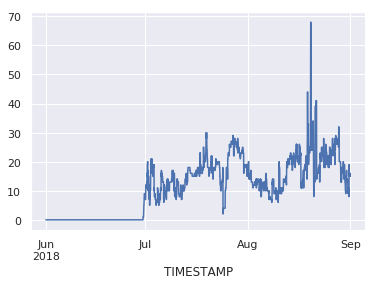

In [254]:
data2['active_deal_number'].plot()

In [255]:
df_connor = df[df.consumer_ID == "0x417c92FbD944b125A578848DE44a4FD9132E0911"]

In [256]:
df_connor.head()

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-17 03:21:17,2018-08-17 03:26:26,0 days 00:05:09,5.15
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 02:56:02,2018-08-19 02:57:53,0 days 00:01:51,1.85
8,"{""deal"":{""id"":""3891""","""benchmarks"":{""values"":[108",1113,8,256000000,67108864,1000002,1000001,1,6368002048,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x734C2a165e57496169aAAEA6E22aE763fF8d7654,0.018698,19.778,3891,0x6F6B9a47668D96b3758D79c67c30A290934a759F,2018-08-16 01:02:14,2018-08-16 03:18:59,0 days 02:16:45,136.75
16,"{""deal"":{""id"":""4704""","""benchmarks"":{""values"":[103",1300,2,512000000,67108864,1000001,1000000,6,8511291392,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,0.142238,159.643,4704,0x416Af57F633e292b25976573a460d7C3200feD34,2018-08-21 21:22:34,2018-08-21 22:09:37,0 days 00:47:03,47.05
18,"{""deal"":{""id"":""2218""","""benchmarks"":{""values"":[111",1534,8,256000000,67108864,1000000,1000000,2,4281323520,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x0De7409c558E34A64B9A200a38Dbd2677f69eaCf,0.063238,43.417,2218,0x517648Ec2E592969Ec344642034F079c52AfD025,2018-07-24 15:23:46,2018-07-25 17:52:25,1 days 02:28:39,1588.65


In [257]:
def calclate_connor_deals(time_stamp):
    return len(df_connor[(df_connor.starttime<time_stamp) & (df_connor.endtime>time_stamp)])

In [258]:
data['connor_deal_number'] = data['TIMESTAMP'].apply(calclate_connor_deals)

In [259]:
data2 = data.set_index('TIMESTAMP')

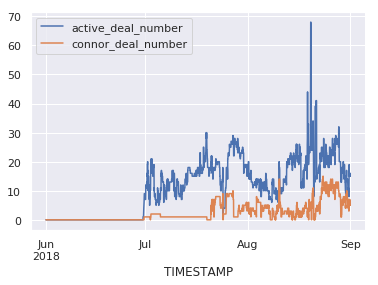

In [262]:
data2[['active_deal_number','connor_deal_number']].plot()

In [264]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])].groupby('master_ID').describe()

Ethash                          \
                                            count        mean         std   
master_ID                                                                   
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4    1.0  172.350000         NaN   
0x25158E6f8dD683d222E3785BA2294A319489084E    1.0   22.179000         NaN   
0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f    1.0   12.220000         NaN   
0x416Af57F633e292b25976573a460d7C3200feD34    3.0  159.752333   26.604168   
0x424129085f9b7F0Cc07c47D077206d835a2A7B2b    1.0   30.105000         NaN   
0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA    3.0   26.442000   30.296063   
0x517648Ec2E592969Ec344642034F079c52AfD025    2.0   29.558500    4.094855   
0x61a2bB7A14177820F852afb95E3625b6A370079C    2.0    0.000000    0.000000   
0x6F6B9a47668D96b3758D79c67c30A290934a759F    1.0   19.778000         NaN   
0x87d341DF84A64b5289cf8A504F22cC10F509E9d6    1.0    0.000000         NaN   
0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01    1.0   21.959000         NaN   
0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD    1.0  165.157000         NaN   
0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F    1.0  129.860000         NaN   
0xa90f716CF6ed3Bb999FE735B4C845b8DAf49672F    1.0   64.894000         NaN   
0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d    2.0   21.711000    0.005657   
0xd44b2f0705E51ec2B4F3B5EE4b0961e5127fdF82    1.0   85.636000         NaN   
0xedB7Ae4B946Cf249349974A02e354B5FBC577798    2.0  109.769500  155.237516   

                                                                          \
                                                min        25%       50%   
master_ID                                                                  
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4  172.350  172.35000  172.3500   
0x25158E6f8dD683d222E3785BA2294A319489084E   22.179   22.17900   22.1790   
0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f   12.220   12.22000   12.2200   
0x416Af57F633e292b25976573a460d7C3200feD34  133.203  146.42300  159.6430   
0x424129085f9b7F0Cc07c47D077206d835a2A7B2b   30.105   30.10500   30.1050   
0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA    0.000    9.91350   19.8270   
0x517648Ec2E592969Ec344642034F079c52AfD025   26.663   28.11075   29.5585   
0x61a2bB7A14177820F852afb95E3625b6A370079C    0.000    0.00000    0.0000   
0x6F6B9a47668D96b3758D79c67c30A290934a759F   19.778   19.77800   19.7780   
0x87d341DF84A64b5289cf8A504F22cC10F509E9d6    0.000    0.00000    0.0000   
0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01   21.959   21.95900   21.9590   
0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD  165.157  165.15700  165.1570   
0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F  129.860  129.86000  129.8600   
0xa90f716CF6ed3Bb999FE735B4C845b8DAf49672F   64.894   64.89400   64.8940   
0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d   21.707   21.70900   21.7110   
0xd44b2f0705E51ec2B4F3B5EE4b0961e5127fdF82   85.636   85.63600   85.6360   
0xedB7Ae4B946Cf249349974A02e354B5FBC577798    0.000   54.88475  109.7695   

                                                               deal_ID  \
                                                  75%      max   count   
master_ID                                                                
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4  172.35000  172.350     1.0   
0x25158E6f8dD683d222E3785BA2294A319489084E   22.17900   22.179     1.0   
0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f   12.22000   12.220     1.0   
0x416Af57F633e292b25976573a460d7C3200feD34  173.02700  186.411     3.0   
0x424129085f9b7F0Cc07c47D077206d835a2A7B2b   30.10500   30.105     1.0   
0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA   39.66300   59.499     3.0   
0x517648Ec2E592969Ec344642034F079c52AfD025   31.00625   32.454     2.0   
0x61a2bB7A14177820F852afb95E3625b6A370079C    0.00000    0.000     2.0   
0x6F6B9a47668D96b3758D79c67c30A290934a759F   19.77800   19.778     1.0   
0x87d341DF84A64b5289cf8A504F22cC10F509E9d6    0.00000    0.000     1.0   
0xAAA932d77935EE3d8

In [265]:
len(df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])].groupby('master_ID').describe())

17

In [266]:
def calclate_unique_supplier(time_stamp):
    return len(df[(df.starttime<time_stamp) & (df.endtime>time_stamp)].groupby('master_ID').describe())

In [268]:
calclate_unique_supplier(data['TIMESTAMP'][2000])

17

In [269]:
data['supplier_number'] = data['TIMESTAMP'].apply(calclate_unique_supplier)

In [270]:
data2 = data.set_index('TIMESTAMP')

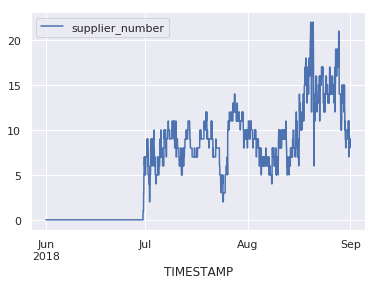

In [271]:
data2[['supplier_number']].plot()

In [272]:
def calclate_unique_consumer(time_stamp):
    return len(df[(df.starttime<time_stamp) & (df.endtime>time_stamp)].groupby('consumer_ID').describe())

In [273]:
data['consumerr_number'] = data['TIMESTAMP'].apply(calclate_unique_consumer)

In [276]:
data['counsumer_number']= data['consumerr_number']

In [277]:
data2 = data.set_index('TIMESTAMP')

In [279]:
data2.head()

,TYPE,active_deal_number,connor_deal_number,supplier_number,consumerr_number,counsumer_number
TIMESTAMP,,,,,,
2018-06-01 00:00:00,9,0,0,0,0,0
2018-06-01 01:00:00,4,0,0,0,0,0
2018-06-01 02:00:00,9,0,0,0,0,0
2018-06-01 03:00:00,6,0,0,0,0,0
2018-06-01 04:00:00,9,0,0,0,0,0


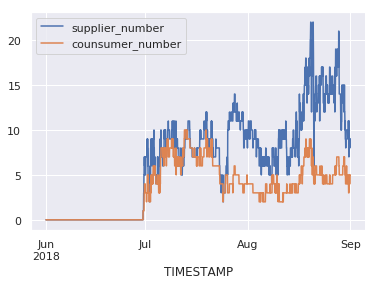

In [280]:
data2[['supplier_number','counsumer_number']].plot()

In [238]:
df[df.endtime>data['TIMESTAMP'][2000]]

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
20,"{""deal"":{""id"":""5531""","""benchmarks"":{""values"":[1035",1113,8,256000000,67108864,1000000,1000001,0,0,...,0xF722c6A22B38c087e9249afe6a2fd7635ffB154E,0x734C2a165e57496169aAAEA6E22aE763fF8d7654,0.000700,0.000,5531,0x6F6B9a47668D96b3758D79c67c30A290934a759F,2018-08-29 23:36:41,2018-08-30 00:05:26,0 days 00:28:45,28.750000
382,"{""deal"":{""id"":""5770""","""benchmarks"":{""values"":[105",1079,2,512000000,67108864,1000000,1000000,3,4232052736,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x730F19B7FA079EBfDc7360066ec593e4Bdd46Bf2,0.034542,37.089,5770,0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f,2018-09-01 08:28:26,2018-09-01 08:35:05,0 days 00:06:39,6.650000
387,"{""deal"":{""id"":""5534""","""benchmarks"":{""values"":[1003",775,16,256000000,67108864,1000000,1000000,0,0,...,0xeFe1976D528FdeAC56E09115462dDedB26254BF7,0x9cac32fE29923Fa801665FBFd7968EFe0c473C3a,0.001000,0.000,5534,0x9115B03bA37AF450b21bc23b546Ff7666E30015D,2018-08-30 00:26:35,2018-08-30 01:18:47,0 days 00:52:12,52.200000
414,"{""deal"":{""id"":""5771""","""benchmarks"":{""values"":[307",1079,2,512000000,67108864,1000000,1000000,3,4232052736,...,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,0x730F19B7FA079EBfDc7360066ec593e4Bdd46Bf2,0.026533,37.089,5771,0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f,2018-09-01 08:41:59,2018-09-01 08:44:14,0 days 00:02:15,2.250000
487,"{""deal"":{""id"":""5799""","""benchmarks"":{""values"":[103",1300,4,512000000,67108864,1000000,1000000,1,6368002048,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.019171,21.959,5799,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-09-01 15:50:05,2018-09-01 16:02:17,0 days 00:12:12,12.200000
539,"{""deal"":{""id"":""5294""","""benchmarks"":{""values"":[105",1300,2,512000000,67108864,1000000,1000000,7,8513388544,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x672Ee945a55327328472B1a02437293945157f4C,0.168099,186.411,5294,0x416Af57F633e292b25976573a460d7C3200feD34,2018-08-27 15:40:41,2018-08-27 15:41:05,0 days 00:00:24,0.400000
550,"{""deal"":{""id"":""4933""","""benchmarks"":{""values"":[2041",1377,8,2000000000,5000000000,1000000,1000000,0,0,...,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xC82f32409dA01277C8a3dcA86c20d8Af93d0fa67,0.000000,0.000,4933,0xe2eC5A79Bf998B6F7e0Ae8BFE0AC618ABD134DdF,2018-08-24 03:48:34,2018-08-24 04:06:19,0 days 00:17:45,17.750000
609,"{""deal"":{""id"":""5088""","""benchmarks"":{""values"":[102",778,2,512000000,67108864,1000000,1000000,1,11720982528,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x47012859fC5cB44d6106D54ff77580c85C380ecc,0.016462,22.179,5088,0x25158E6f8dD683d222E3785BA2294A319489084E,2018-08-25 05:33:56,2018-08-25 05:36:50,0 days 00:02:54,2.900000
702,"{""deal"":{""id"":""4936""","""benchmarks"":{""values"":[103",1288,2,512000000,67108864,1000000,1000000,6,8223842304,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x7C339f2cfeeDFDB1748a15E466F6bbC49770B48A,0.145623,164.708,4936,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,2018-08-24 05:03:37,2018-08-24 05:05:46,0 days 00:02:09,2.150000
774,"{""deal"":{""id"":""5216""","""benchmarks"":{""values"":[103",1141,2,512000001,67108864,1000000,1000000,6,4238344192,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1a5d1841078be8d8f2b54D4F3264438a69e94C94,0.164621,205.611,5216,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,2018-08-26 12:25:14,2018-08-26 12:25:29,0 days 00:00:15,0.250000


In [234]:
df[df.starttime>data['TIMESTAMP'][1000]]

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,4698,0x24E192b02d33501f225580d6B19A8d97C5190D45,2018-08-21 17:25:49,2018-08-21 19:39:19,0 days 02:13:30,133.500000
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-17 03:21:17,2018-08-17 03:26:26,0 days 00:05:09,5.150000
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 02:56:02,2018-08-19 02:57:53,0 days 00:01:51,1.850000
8,"{""deal"":{""id"":""3891""","""benchmarks"":{""values"":[108",1113,8,256000000,67108864,1000002,1000001,1,6368002048,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x734C2a165e57496169aAAEA6E22aE763fF8d7654,0.018698,19.778,3891,0x6F6B9a47668D96b3758D79c67c30A290934a759F,2018-08-16 01:02:14,2018-08-16 03:18:59,0 days 02:16:45,136.750000
11,"{""deal"":{""id"":""1392""","""benchmarks"":{""values"":[203",1277,4,256000000,67108864,1000001,1000000,1,6370099200,...,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,0x8D94E5A8B1F48268b389147FCd13B1D4a63b170e,0.020524,19.441,1392,0x63dA2009Ff928f99D960F48CBDd76C5a3E8591c4,2018-07-12 16:32:58,2018-07-12 16:46:13,0 days 00:13:15,13.250000
15,"{""deal"":{""id"":""3624""","""benchmarks"":{""values"":[606",1397,48,1073741824,10737418240,7340032,7340032,0,0,...,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,0xfb2c6c866e1022C94377Dc4f31E1aa867198425C,0.005000,0.000,3624,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,2018-08-15 16:35:43,2018-08-15 17:05:49,0 days 00:30:06,30.100000
16,"{""deal"":{""id"":""4704""","""benchmarks"":{""values"":[103",1300,2,512000000,67108864,1000001,1000000,6,8511291392,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,0.142238,159.643,4704,0x416Af57F633e292b25976573a460d7C3200feD34,2018-08-21 21:22:34,2018-08-21 22:09:37,0 days 00:47:03,47.050000
18,"{""deal"":{""id"":""2218""","""benchmarks"":{""values"":[111",1534,8,256000000,67108864,1000000,1000000,2,4281323520,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x0De7409c558E34A64B9A200a38Dbd2677f69eaCf,0.063238,43.417,2218,0x517648Ec2E592969Ec344642034F079c52AfD025,2018-07-24 15:23:46,2018-07-25 17:52:25,1 days 02:28:39,1588.650000
19,"{""deal"":{""id"":""2279""","""benchmarks"":{""values"":[1001",1142,32,2000000000,67108864,9800000,5000000,0,0,...,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,0xFEe641fD3e5288E39238887dFa26958FB08a0eB1,0.004000,0.000,2279,0x99e4bfC6Eec8542f5fc7e8017bfAeC35dcB65F65,2018-07-26 11:28:19,2018-07-26 12:43:22,0 days 01:15:03,75.050000
20,"{""deal"":{""id"":""5531""","""benchmarks"":{""values"":[1035",1113,8,256000000,67108864,1000000,1000001,0,0,...,0xF722c6A22B38c087e9249afe6a2fd7635ffB154E,0x734C2a165e57496169aAAEA6E22aE763fF8d7654,0.000700,0.000,5531,0x6F6B9a47668D96b3758D79c67c30A290934a759F,2018-08-29 23:36:41,2018-08-30 00:05:26,0 days 00:28:45,28.750000


In [220]:
times

DatetimeIndex(['2018-06-01 00:00:00', '2018-06-01 01:00:00',
               '2018-06-01 02:00:00', '2018-06-01 03:00:00',
               '2018-06-01 04:00:00', '2018-06-01 05:00:00',
               '2018-06-01 06:00:00', '2018-06-01 07:00:00',
               '2018-06-01 08:00:00', '2018-06-01 09:00:00',
               ...
               '2018-08-31 15:00:00', '2018-08-31 16:00:00',
               '2018-08-31 17:00:00', '2018-08-31 18:00:00',
               '2018-08-31 19:00:00', '2018-08-31 20:00:00',
               '2018-08-31 21:00:00', '2018-08-31 22:00:00',
               '2018-08-31 23:00:00', '2018-09-01 00:00:00'],
              dtype='datetime64[ns]', length=2209, freq='H')

In [207]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,4698,0x24E192b02d33501f225580d6B19A8d97C5190D45,2018-08-21 17:25:49,2018-08-21 19:39:19,02:13:30,133.50
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,720,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-09 23:16:40,2018-07-09 23:17:37,00:00:57,0.95
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45,198.75
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-17 03:21:17,2018-08-17 03:26:26,00:05:09,5.15
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 02:56:02,2018-08-19 02:57:53,00:01:51,1.85


# Run statistics for suppliers

In [223]:
df.groupby('supplier_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
supplier_ID,,,,,,,,
0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,2.0,86.0195,80.814527,28.875,57.44725,86.0195,114.59175,143.164
0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,1.0,133.2030,NaN,133.203,133.20300,133.2030,133.20300,133.203
0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,1.0,21.9590,NaN,21.959,21.95900,21.9590,21.95900,21.959
0x26200241593722FA17DE5722Ed66d8830dc58C6D,1.0,219.5390,NaN,219.539,219.53900,219.5390,219.53900,219.539
0x2f1B94E3813d66967a478031889F230D805130Ec,1.0,30.1050,NaN,30.105,30.10500,30.1050,30.10500,30.105
0x323FB5f356088ae979F12f27f94013e449BC62df,1.0,0.0000,NaN,0.000,0.00000,0.0000,0.00000,0.000
0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,2.0,21.7110,0.005657,21.707,21.70900,21.7110,21.71300,21.715
0x38B904701577720d4Eb06b5d28A7bd02a443711F,1.0,172.3500,NaN,172.350,172.35000,172.3500,172.35000,172.350
0x4FC67349467228BF3e57A8eaAf135D93C3558239,1.0,173.1970,NaN,173.197,173.19700,173.1970,173.19700,173.197


In [224]:
df10 = df.groupby('supplier_ID').describe()['Ethash']

In [225]:
df10.to_csv('eth.csv')

In [226]:
df11 = pd.read_csv('eth.csv')

In [227]:
df11['total_Ethash']= df11['count']*df11['mean']

In [228]:
df11[['supplier_ID','total_Ethash','count']]

,supplier_ID,total_Ethash,count
0,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,172.039,2.0
1,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,133.203,1.0
2,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,21.959,1.0
3,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.539,1.0
4,0x2f1B94E3813d66967a478031889F230D805130Ec,30.105,1.0
5,0x323FB5f356088ae979F12f27f94013e449BC62df,0.000,1.0
6,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,43.422,2.0
7,0x38B904701577720d4Eb06b5d28A7bd02a443711F,172.350,1.0
8,0x4FC67349467228BF3e57A8eaAf135D93C3558239,173.197,1.0
9,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0


In [229]:
df11[['supplier_ID','total_Ethash','count']].sort_values('total_Ethash', ascending = False)

,supplier_ID,total_Ethash,count
3,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.539,1.0
9,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0
8,0x4FC67349467228BF3e57A8eaAf135D93C3558239,173.197,1.0
7,0x38B904701577720d4Eb06b5d28A7bd02a443711F,172.350,1.0
0,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,172.039,2.0
24,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,159.643,1.0
1,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,133.203,1.0
10,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,129.860,1.0
18,0xA0885038D127f628B3DC7f406004dE104d0bF496,79.326,1.0
20,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,59.117,2.0


In [230]:
df12 = df11[['supplier_ID','total_Ethash','count']].sort_values('total_Ethash', ascending = False)

In [231]:
df12.to_csv('ethash.csv', index = False)

In [232]:
df13 = pd.read_csv('ethash.csv')

In [233]:
df13

,supplier_ID,total_Ethash,count
0,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.539,1.0
1,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0
2,0x4FC67349467228BF3e57A8eaAf135D93C3558239,173.197,1.0
3,0x38B904701577720d4Eb06b5d28A7bd02a443711F,172.350,1.0
4,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,172.039,2.0
5,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,159.643,1.0
6,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,133.203,1.0
7,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,129.860,1.0
8,0xA0885038D127f628B3DC7f406004dE104d0bF496,79.326,1.0
9,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,59.117,2.0


In [234]:
df13['total_Ethash'].sum()

1612.1689999999999

In [235]:
print('Real-time total Ethash rate of the entire SONM platform is '+ str(df13['total_Ethash'].sum()) +' Mh/s')

Real-time total Ethash rate of the entire SONM platform is 1612.169 Mh/s


## supplier's revenue

In [236]:
df13['supplier_ID'][0]

'0x26200241593722FA17DE5722Ed66d8830dc58C6D'

In [237]:
df[df.supplier_ID == df13['supplier_ID'][0]]['price_USD/h'].sum()

0.20459999999999878

In [238]:
def total_revenue(address):
    return df[df.supplier_ID == address]['price_USD/h'].sum()

In [239]:
total_revenue(df13['supplier_ID'][0])

0.20459999999999878

In [240]:
df13['total_revenue_USD/h'] = df13['supplier_ID'].apply(total_revenue)

In [241]:
df13.dtypes

supplier_ID             object
total_Ethash           float64
count                  float64
total_revenue_USD/h    float64
dtype: object

In [242]:
df13['total_revenue_USD/d'] = df13['total_revenue_USD/h'] *24

In [243]:
df13['revenue_USD/d'] = df13['total_revenue_USD/d'].map('${:,.2f}'.format)

In [244]:
df13.head()

,supplier_ID,total_Ethash,count,total_revenue_USD/h,total_revenue_USD/d,revenue_USD/d
0,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.539,1.0,0.204600,4.910400,$4.91
1,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0,0.186366,4.472783,$4.47
2,0x4FC67349467228BF3e57A8eaAf135D93C3558239,173.197,1.0,0.153831,3.691944,$3.69
3,0x38B904701577720d4Eb06b5d28A7bd02a443711F,172.350,1.0,0.154052,3.697258,$3.70
4,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,172.039,2.0,0.153980,3.695524,$3.70


In [245]:
sns.set()

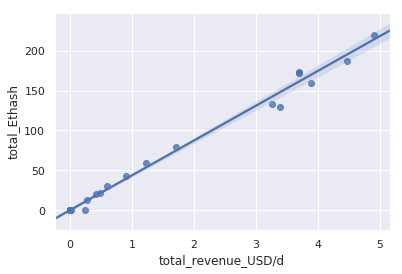

In [246]:
sns.regplot(y="total_Ethash", x="total_revenue_USD/d", data=df13)

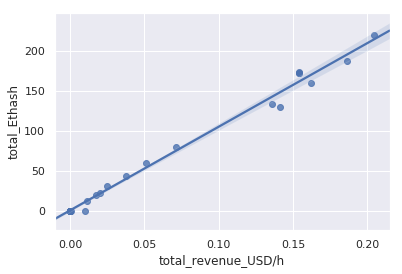

In [247]:
sns.regplot(y="total_Ethash", x="total_revenue_USD/h", data=df13)

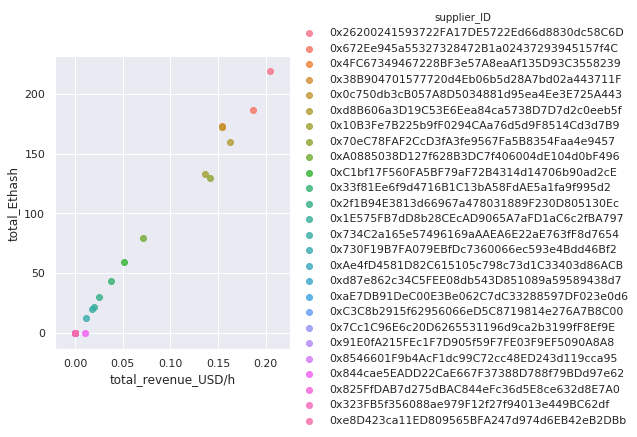

In [248]:
sns.lmplot( y="total_Ethash", x="total_revenue_USD/h", data=df13, fit_reg=False, hue='supplier_ID', legend=True)

In [249]:
df13[['supplier_ID','total_Ethash','count','revenue_USD/d']]

,supplier_ID,total_Ethash,count,revenue_USD/d
0,0x26200241593722FA17DE5722Ed66d8830dc58C6D,219.539,1.0,$4.91
1,0x672Ee945a55327328472B1a02437293945157f4C,186.411,1.0,$4.47
2,0x4FC67349467228BF3e57A8eaAf135D93C3558239,173.197,1.0,$3.69
3,0x38B904701577720d4Eb06b5d28A7bd02a443711F,172.350,1.0,$3.70
4,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,172.039,2.0,$3.70
5,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,159.643,1.0,$3.89
6,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,133.203,1.0,$3.26
7,0x70eC78FAF2CcD3fA3fe9567Fa5B8354Faa4e9457,129.860,1.0,$3.39
8,0xA0885038D127f628B3DC7f406004dE104d0bF496,79.326,1.0,$1.71
9,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,59.117,2.0,$1.23


In [250]:
df13['total_revenue_USD/d'].sum()

36.88961800106425

In [251]:
df13['total_revenue_USD/d'].sum()

36.88961800106425

In [252]:
"{:.2f}".format(df13['total_revenue_USD/d'].sum())

'36.89'

In [253]:
print('At this moment, total ' + str("{:.2f}".format(df13['total_revenue_USD/d'].sum())) + ' USD/day is spent on the entire SONM platform.')

At this moment, total 36.89 USD/day is spent on the entire SONM platform.


# Run the same statistics for consumers

In [254]:
df.groupby('consumer_ID').describe()['Ethash']

,count,mean,std,min,25%,50%,75%,max
consumer_ID,,,,,,,,
0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,14.0,60.062571,84.436200,0.000,0.000,0.000,132.36725,219.539
0x417c92FbD944b125A578848DE44a4FD9132E0911,11.0,68.121273,63.468765,19.778,24.189,30.105,111.24500,173.197
0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,3.0,0.000000,0.000000,0.000,0.000,0.000,0.00000,0.000
0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000
0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,1.0,21.959000,NaN,21.959,21.959,21.959,21.95900,21.959
0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000
0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000
0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000
0xe7517190DB97Ea55E985abdA33745AfC41a83592,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000


In [255]:
df10 = df.groupby('consumer_ID').describe()['Ethash']

In [256]:
df10.to_csv('consumer.csv')

In [257]:
df11 = pd.read_csv('consumer.csv')

In [258]:
df11['total_Ethash']= df11['mean']*df11['count']

In [259]:
df11

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,14.0,60.062571,84.436200,0.000,0.000,0.000,132.36725,219.539,840.876
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,11.0,68.121273,63.468765,19.778,24.189,30.105,111.24500,173.197,749.334
2,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,3.0,0.000000,0.000000,0.000,0.000,0.000,0.00000,0.000,0.000
3,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000,0.000
4,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,1.0,21.959000,NaN,21.959,21.959,21.959,21.95900,21.959,21.959
5,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000,0.000
6,0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000,0.000
7,0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000,0.000
8,0xe7517190DB97Ea55E985abdA33745AfC41a83592,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000,0.000


In [260]:
def total_expense(address):
    return df[df.consumer_ID == address]['price_USD/h'].sum()

In [261]:
df11['total_expense_USD/h'] = df11['consumer_ID'].apply(total_expense)

In [262]:
df11['total_expense_USD/d'] = df11['total_expense_USD/h'] *24

In [263]:
df11['expense_USD/d'] = df11['total_expense_USD/d'].map('${:,.2f}'.format)

In [264]:
df11.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash,total_expense_USD/h,total_expense_USD/d,expense_USD/d
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,14.0,60.062571,84.436200,0.000,0.000,0.000,132.36725,219.539,840.876,8.425604e-01,2.022145e+01,$20.22
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,11.0,68.121273,63.468765,19.778,24.189,30.105,111.24500,173.197,749.334,6.643669e-01,1.594480e+01,$15.94
2,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,3.0,0.000000,0.000000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000000e+00,0.000000e+00,$0.00
3,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000,0.000,3.110400e-10,7.464960e-09,$0.00
4,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,1.0,21.959000,NaN,21.959,21.959,21.959,21.95900,21.959,21.959,2.014018e-02,4.833642e-01,$0.48


In [265]:
df11.sort_values(['total_Ethash','count'], ascending = False)

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash,total_expense_USD/h,total_expense_USD/d,expense_USD/d
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,14.0,60.062571,84.436200,0.000,0.000,0.000,132.36725,219.539,840.876,8.425604e-01,2.022145e+01,$20.22
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,11.0,68.121273,63.468765,19.778,24.189,30.105,111.24500,173.197,749.334,6.643669e-01,1.594480e+01,$15.94
4,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,1.0,21.959000,NaN,21.959,21.959,21.959,21.95900,21.959,21.959,2.014018e-02,4.833642e-01,$0.48
2,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,3.0,0.000000,0.000000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000000e+00,0.000000e+00,$0.00
3,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000,0.000,3.110400e-10,7.464960e-09,$0.00
5,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000,0.000,1.000000e-02,2.400000e-01,$0.24
6,0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000,0.000,0.000000e+00,0.000000e+00,$0.00
7,0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000,0.000,0.000000e+00,0.000000e+00,$0.00
8,0xe7517190DB97Ea55E985abdA33745AfC41a83592,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000,0.000,0.000000e+00,0.000000e+00,$0.00


In [266]:
df11 = df11.sort_values(['total_Ethash','count'], ascending = False)

In [267]:
df11.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max,total_Ethash,total_expense_USD/h,total_expense_USD/d,expense_USD/d
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,14.0,60.062571,84.436200,0.000,0.000,0.000,132.36725,219.539,840.876,8.425604e-01,2.022145e+01,$20.22
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,11.0,68.121273,63.468765,19.778,24.189,30.105,111.24500,173.197,749.334,6.643669e-01,1.594480e+01,$15.94
4,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,1.0,21.959000,NaN,21.959,21.959,21.959,21.95900,21.959,21.959,2.014018e-02,4.833642e-01,$0.48
2,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,3.0,0.000000,0.000000,0.000,0.000,0.000,0.00000,0.000,0.000,0.000000e+00,0.000000e+00,$0.00
3,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,1.0,0.000000,NaN,0.000,0.000,0.000,0.00000,0.000,0.000,3.110400e-10,7.464960e-09,$0.00


In [268]:
df11[['consumer_ID', 'total_Ethash', 'count','expense_USD/d']].sort_values(['total_Ethash','count'], ascending = False)

,consumer_ID,total_Ethash,count,expense_USD/d
0,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,840.876,14.0,$20.22
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,749.334,11.0,$15.94
4,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,21.959,1.0,$0.48
2,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0.000,3.0,$0.00
3,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,0.000,1.0,$0.00
5,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,0.000,1.0,$0.24
6,0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11,0.000,1.0,$0.00
7,0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d,0.000,1.0,$0.00
8,0xe7517190DB97Ea55E985abdA33745AfC41a83592,0.000,1.0,$0.00


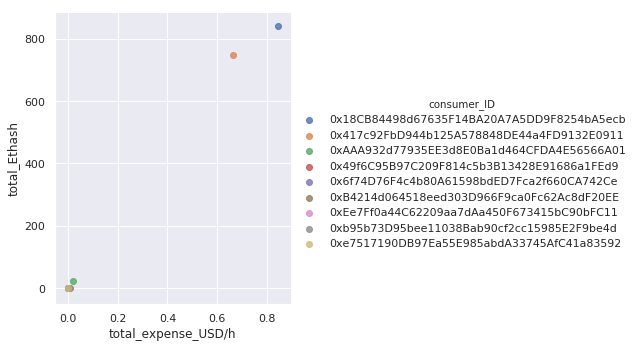

In [269]:
sns.lmplot( y="total_Ethash", x="total_expense_USD/h", data=df11, fit_reg=False, hue='consumer_ID', legend=True)

# Connor's deals

In [270]:
df[df.consumer_ID == '0x417c92FbD944b125A578848DE44a4FD9132E0911']

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,consumer_ID,supplier_ID,price_USD/h,Ethash
3,"{""deal"":{""id"":""4835""","""benchmarks"":{""values"":[108",1113,8,512000000,67108864,1000000,1000001,1,6368002048,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Nk...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x734C2a165e57496169aAAEA6E22aE763fF8d7654,0.017390,19.778
4,"{""deal"":{""id"":""4830""","""benchmarks"":{""values"":[109",1522,8,512000000,67108864,1000000,1000000,1,4292050944,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Yj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,0.018727,21.715
9,"{""deal"":{""id"":""4818""","""benchmarks"":{""values"":[109",1522,8,512000000,67108864,1000000,1000000,1,4292050944,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Yj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,0.018727,21.707
12,"{""deal"":{""id"":""5062""","""benchmarks"":{""values"":[108",990,2,512000000,67108864,1000000,1000000,1,8518508544,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,0.024524,28.875
13,"{""deal"":{""id"":""5061""","""benchmarks"":{""values"":[108",990,2,512000000,67108864,1000000,1000000,5,7926202368,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,0.129456,143.164
21,"{""deal"":{""id"":""4881""","""benchmarks"":{""values"":[104",1062,4,512000000,67108864,1000000,1000000,1,8512339968,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x2f1B94E3813d66967a478031889F230D805130Ec,0.025210,30.105
22,"{""deal"":{""id"":""5046""","""benchmarks"":{""values"":[108",1094,2,512000000,67108864,1000000,1000000,6,8507097088,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x38B904701577720d4Eb06b5d28A7bd02a443711F,0.154052,172.350
23,"{""deal"":{""id"":""4943""","""benchmarks"":{""values"":[104",1949,16,512000000,67108864,1000000,1000000,4,6372196352,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NG...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xA0885038D127f628B3DC7f406004dE104d0bF496,0.071172,79.326
25,"{""deal"":{""id"":""5077""","""benchmarks"":{""values"":[103",989,2,512000000,67108864,1000000,1000000,6,8016764928,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x4FC67349467228BF3e57A8eaAf135D93C3558239,0.153831,173.197
28,"{""deal"":{""id"":""4837""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,8513388544,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4NT...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",None,0x417c92FbD944b125A5788

In [271]:
df12 = df[df.consumer_ID == '0x417c92FbD944b125A578848DE44a4FD9132E0911']

In [272]:
df12 = df12.sort_values(['Ethash', 'price_USD/h'], ascending = False)

In [273]:
df12[['consumer_ID', 'supplier_ID', 'price_USD/h', 'Ethash',0]]

,consumer_ID,supplier_ID,price_USD/h,Ethash,0
25,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x4FC67349467228BF3e57A8eaAf135D93C3558239,0.153831,173.197,"{""deal"":{""id"":""5077"""
22,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x38B904701577720d4Eb06b5d28A7bd02a443711F,0.154052,172.350,"{""deal"":{""id"":""5046"""
13,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,0.129456,143.164,"{""deal"":{""id"":""5061"""
23,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xA0885038D127f628B3DC7f406004dE104d0bF496,0.071172,79.326,"{""deal"":{""id"":""4943"""
29,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.028091,32.454,"{""deal"":{""id"":""4836"""
21,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x2f1B94E3813d66967a478031889F230D805130Ec,0.025210,30.105,"{""deal"":{""id"":""4881"""
12,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x0c750db3cB057A8D5034881d95ea4Ee3E725A443,0.024524,28.875,"{""deal"":{""id"":""5062"""
28,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.023186,26.663,"{""deal"":{""id"":""4837"""
4,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,0.018727,21.715,"{""deal"":{""id"":""4830"""
9,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,0.018727,21.707,"{""deal"":{""id"":""4818"""


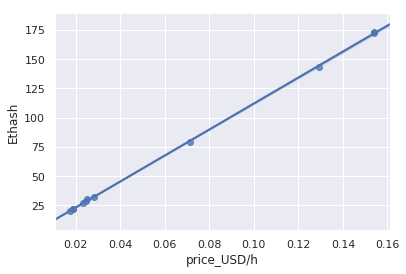

In [274]:
sns.regplot( y="Ethash", x="price_USD/h", data=df12)

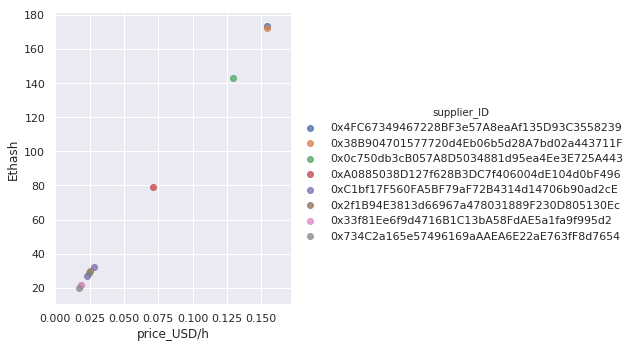

In [275]:
sns.lmplot( y="Ethash", x="price_USD/h", data=df12, fit_reg=False, hue='supplier_ID', legend=True)

In [276]:
0.194853 * 1.05

0.20459565000000002

# Conclusions

In [289]:
print('Real-time total Ethash rate of the entire SONM platform is '+ str(df13['total_Ethash'].sum()) +' Mh/s.')

print('At this moment, total ' + str("{:.2f}".format(df13['total_revenue_USD/d'].sum())) + ' USD/day are spent on the entire SONM platform.')

print('Connor currently has '+ str(len(df12)) + ' deals.')

print('Connor currently pays ' + str("{:.2f}".format(df12['price_USD/h'].sum()*24)) + " USD/day.") 

print('Connor currently mines ETH with ' + str(df12['Ethash'].sum()) + ' Mh/s hashrate.')

print('There are '+ str(len(df13))+ ' unique suppliers at this moment.')

print('There are ' + str(len(df13[df13['total_Ethash']>0])) + ' unique GPU sppliers at this moment.')

print('There are ' + str(len(df13)-len(df13[df13['total_Ethash']>0])) + ' unique CPU sppliers at this moment.')

print('There are '+ str(len(df11))+ ' unique consumers at this moment.')

print('Currenlty, there are total '+ str(len(df)) + ' deals.')

print('Of which ' + str(len(df[df.Ethash>0])) + ' deals contain GPU.')

print('And ' + str(len(df[df.Ethash==0])) + ' deals are CPU only.')




Real-time total Ethash rate of the entire SONM platform is 1612.169 Mh/s.
At this moment, total 36.89 USD/day are spent on the entire SONM platform.
Connor currently has 11 deals.
Connor currently pays 15.94 USD/day.
Connor currently mines ETH with 749.334 Mh/s hashrate.
There are 26 unique suppliers at this moment.
There are 15 unique GPU sppliers at this moment.
There are 11 unique CPU sppliers at this moment.
There are 9 unique consumers at this moment.
Currenlty, there are total 34 deals.
Of which 18 deals contain GPU.
And 16 deals are CPU only.


In [194]:
rate = 0.0008574 * 0.96

In [195]:
0.0008574 * 0.96

0.000823104

In [196]:
Mhs = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220]

In [197]:
for item in Mhs:
    print("{:.8f}".format(item*rate), item)

('0.00823104', 10)
('0.01646208', 20)
('0.02469312', 30)
('0.03292416', 40)
('0.04115520', 50)
('0.04938624', 60)
('0.05761728', 70)
('0.06584832', 80)
('0.07407936', 90)
('0.08231040', 100)
('0.09054144', 110)
('0.09877248', 120)
('0.10700352', 130)
('0.11523456', 140)
('0.12346560', 150)
('0.13169664', 160)
('0.13992768', 170)
('0.14815872', 180)
('0.15638976', 190)
('0.16462080', 200)
('0.17285184', 210)
('0.18108288', 220)
